<a href="https://colab.research.google.com/github/domanmat/Airbnb_data_analysis/blob/main/projekt_PRBD_Domanski_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import and load packages

In [ ]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats


In [ ]:
sns.set_style("whitegrid")

# Ustawienia Pandas - pokazuje wszystkie kolumny i wiersze
pd.set_option('display.max_columns', None)          # Wszystkie kolumny
pd.set_option('display.width', 1000)                # Szerokość wyświetlania
pd.set_option('display.max_colwidth', 50)           # Max szerokość pojedynczej kolumny
pd.set_option('display.expand_frame_repr', False)   # Nie łam DataFrame na wiele linii
pd.set_option('display.max_rows', None)             # Wszystkie wiersze

# '1. LOAD DATA

###Download

In [ ]:
# download data for Dublin
import gdown
url = 'https://data.insideairbnb.com/ireland/leinster/dublin/2025-09-16/data/listings.csv.gz'

output = "listings_Dublin.gz"
gdown.download(url, output)

Downloading...
From: https://data.insideairbnb.com/ireland/leinster/dublin/2025-09-16/data/listings.csv.gz
To: /content/listings_Dublin.gz
100%|██████████| 3.33M/3.33M [00:00<00:00, 64.3MB/s]


'listings_Dublin.gz'

In [ ]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K Jan 16 22:56 .
drwxr-xr-x 1 root root 4.0K Jan 16 19:16 ..
-rw-r--r-- 1 root root  49K Jan 16 22:49 boolean_distributions.png
-rw-r--r-- 1 root root 275K Jan 16 22:36 boxplots_top_associations.png
-rw-r--r-- 1 root root 267K Jan 16 22:54 categorical_distributions.png
drwxr-xr-x 4 root root 4.0K Dec 11 14:34 .config
-rw-r--r-- 1 root root 1.1M Jan 16 22:36 correlation_heatmap.png
-rw-r--r-- 1 root root 314K Jan 16 22:36 cramers_v_heatmap.png
-rw-r--r-- 1 root root  89K Jan 16 22:49 date_distributions.png
-rw-r--r-- 1 root root  14M Oct 25 16:53 listings.csv
-rw-r--r-- 1 root root 3.2M Jan 16 22:56 listings_Dublin.gz
-rw-r--r-- 1 root root 2.0M Jan 16 22:49 numerical_distributions.png
-rw-r--r-- 1 root root 827K Jan 16 22:36 pairplot_top_vars.png
-rw-r--r-- 1 root root 316K Jan 16 22:36 r2_heatmap.png
drwxr-xr-x 1 root root 4.0K Dec 11 14:34 sample_data


### Extract files

In [ ]:
# # # Install libraries to unzip all
# Unrar the rar file
!7z x {output} -y


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 3329429 bytes (3252 KiB)

Extracting archive: listings_Dublin.gz
--
Path = listings_Dublin.gz
Type = gzip
Headers Size = 23

  0% - listings.csv                   Everything is Ok

Size:       14346864
Compressed: 3329429


In [ ]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K Jan 16 22:56 .
drwxr-xr-x 1 root root 4.0K Jan 16 19:16 ..
-rw-r--r-- 1 root root  49K Jan 16 22:49 boolean_distributions.png
-rw-r--r-- 1 root root 275K Jan 16 22:36 boxplots_top_associations.png
-rw-r--r-- 1 root root 267K Jan 16 22:54 categorical_distributions.png
drwxr-xr-x 4 root root 4.0K Dec 11 14:34 .config
-rw-r--r-- 1 root root 1.1M Jan 16 22:36 correlation_heatmap.png
-rw-r--r-- 1 root root 314K Jan 16 22:36 cramers_v_heatmap.png
-rw-r--r-- 1 root root  89K Jan 16 22:49 date_distributions.png
-rw-r--r-- 1 root root  14M Oct 25 16:53 listings.csv
-rw-r--r-- 1 root root 3.2M Jan 16 22:56 listings_Dublin.gz
-rw-r--r-- 1 root root 2.0M Jan 16 22:49 numerical_distributions.png
-rw-r--r-- 1 root root 827K Jan 16 22:36 pairplot_top_vars.png
-rw-r--r-- 1 root root 316K Jan 16 22:36 r2_heatmap.png
drwxr-xr-x 1 root root 4.0K Dec 11 14:34 sample_data


### Read data

In [ ]:
data_raw = pd.read_csv('listings.csv')

# '2. SIZE OF DATA

## Data Size and info

In [ ]:
print(data_raw.shape)

(6945, 79)


In [ ]:
# Print data_raw info
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6945 entries, 0 to 6944
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6945 non-null   int64  
 1   listing_url                                   6945 non-null   object 
 2   scrape_id                                     6945 non-null   int64  
 3   last_scraped                                  6945 non-null   object 
 4   source                                        6945 non-null   object 
 5   name                                          6945 non-null   object 
 6   description                                   6827 non-null   object 
 7   neighborhood_overview                         2480 non-null   object 
 8   picture_url                                   6945 non-null   object 
 9   host_id                                       6945 non-null   i

# '3. SAMPLE DATA

## Rzut oka na data_raw

In [ ]:
data_raw.head(10)

id                          listing_url       scrape_id last_scraped           source                                              name                                        description                              neighborhood_overview                                        picture_url  host_id                                   host_url       host_name  host_since            host_location                                         host_about  host_response_time host_response_rate host_acceptance_rate host_is_superhost                                 host_thumbnail_url                                   host_picture_url        host_neighbourhood  host_listings_count  host_total_listings_count                host_verifications host_has_profile_pic host_identity_verified                   neighbourhood neighbourhood_cleansed  neighbourhood_group_cleansed  latitude  longitude              property_type        room_type  accommodates  bathrooms    bathrooms_text  bedrooms  beds                                          amenities    price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  availability_eoy  number_of_reviews_ly  estimated_occupancy_l365d  estimated_revenue_l365d first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  license instant_bookable  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month
0   44077   https://www.airbnb.com/rooms/44077  20250916040708   2025-09-16      city scrape               cosy comfortable Irish cottage twin  Our house is a cosy comfortable cottage  with ...  I like our neighbourhood as there is no shorta...  https://a0.muscache.com/pictures/525706/050a3a...   193005   https://www.airbnb.com/users/show/193005          Teresa  2010-08-06          Dublin, Ireland  I am  a friendly outgoing Irishwoman ,who love...      within an hour               100%                  97%                 t  https://a0.muscache.com/im/pictures/user/2167f...  https://a0.muscache.com/im/pictures/user/2167f...                Churchtown                  2.0                        2.0                ['email', 'phone']                    t                      t             Churchtown, Ireland  Dn Laoghaire-Rathdown                           NaN  53.29178   -6.25792   Private room in bungalow     Private room             2        1.0    1 private bath       1.0   2.0  ["Paid washer \u2013 In unit", "Wine glasses",...   $86.00               3              30                     3.0                     3.0                    30.0                    30.0                     3.0                    30.0               NaN                t                6                9                9                 9            2025-09-16                394                     37                       5                 9                    42                        222                  19092.0   2011-03-20  2025-09-13                  4.82                    4.86                       4.77                   4.93                         4.93                    4.68                 4.83      NaN                f                               2                                            0                                             2                                            0               2.23
1   85156   https://www.airbnb.com/rooms/85156  20250916040708   2025-09-16  previous scrape      Cosy Comfortable Irish Cottage  1 Double Bed  Our Cottage is a char

## Raw Data summary

### funkcja - data_summary

In [ ]:
def data_summary(data_raw):
  # Zestawienie typu zmiennej oraz kolumn
  summary = pd.DataFrame({
      'Column Name': data_raw.columns,
      'Type': data_raw.dtypes.values,
      'Non-Null Count': data_raw.count().values,
      'Null Count': data_raw.isnull().sum().values,
      '% of data': [f'{x*100:.2f}%' for x in (data_raw.count().values/(data_raw.count().values+data_raw.isnull().sum().values))],
      'Example row': data_raw.iloc[2]
  }).reset_index(drop=True)

  return summary


In [ ]:
summary=data_summary(data_raw)
summary


Column Name     Type  Non-Null Count  Null Count % of data                                        Example row
0                                             id    int64            6945           0   100.00%                                             159889
1                                    listing_url   object            6945           0   100.00%                https://www.airbnb.com/rooms/159889
2                                      scrape_id    int64            6945           0   100.00%                                     20250916040708
3                                   last_scraped   object            6945           0   100.00%                                         2025-09-16
4                                         source   object            6945           0   100.00%                                        city scrape
5                                           name   object            6945           0   100.00%                               Friendly Single Room
6                                    description   object            6827         118    98.30%  Washing can be done at a cost of €5  per load....
7                          neighborhood_overview   object            2480        4465    35.71%  Plenty of buses into the city and the area is ...
8                                    picture_url   object            6945           0   100.00%  https://a0.muscache.com/pictures/3031697/a8259...
9                                        host_id    int64            6945           0   100.00%                                             766611
10                                      host_url   object            6945           0   100.00%           https://www.airbnb.com/users/show/766611
11                                     host_name   object            6944           1    99.99%                                              Marie
12                                    host_since   object            6944           1    99.99%                                         2011-07-01
13                                 host_location   object            5143        1802    74.05%                            Dublin Airport, Ireland
14                                    host_about   object            2792        4153    40.20%  Used to host students and now I  am looking fo...
15                            host_response_time   object            6031         914    86.84%                                 within a few hours
16                            host_response_rate   object            6031         914    86.84%                                                70%
17                          host_acceptance_rate   object            6485         460    93.38%                                                91%
18                             host_is_superhost   object            6573         372    94.64%                                                  f
19                            host_thumbnail_url   object            6944           1    99.99%  https://a0.muscache.com/im/pictures/user/5059e...
20                              host_picture_url   object            6944           1    99.99%  https://a0.muscache.com/im/pictures/user/5059e...
21                            host_neighbourhood   object            5535        1410    79.70%                                           Beaumont
22                           host_listings_count  float64            6944           1    99.99%                                                3.0
23                     host_total_listings_count  float64            6944           1    99.99%                                                3.0
24                            host_verifications   object            6944           1    99.99%                                 ['email', 'phone']
25                          host_has_profile_pic   object            6944           1    99.99%                                                  t
26                        host_identity_verified   object           

### funkcja - summary_check

In [ ]:
def summary_check(summary):
  # Sprawdź czy są kolumny object z wartościami zawierającymi "."
  warnings = []
  date_columns=[]
  boolean_columns=[]
  for idx, row in summary.iterrows():
      if row['Type'] == 'object':
          example_val = str(row['Example row'])
          if '.' in example_val and not any(c.isalpha() for c in example_val):
              warnings.append(f"⚠️ Numeric - Column '{row['Column Name']}' is 'object' but may contain numeric value:".ljust(85) + f" '{example_val}'")
          if '-' in example_val and example_val.replace('.', '').replace('-', '').isdigit():
              warnings.append(f"⚠️ Date - Column '{row['Column Name']}' is 'object' but may contain date:".ljust(85) + f" '{example_val}'")
              date_columns.append(row['Column Name'])
          if 'f' == example_val or 't' == example_val:
              warnings.append(f"⚠️ Boolean - Column '{row['Column Name']}' is 'object' but may contain boolean:".ljust(85) + f" '{example_val}'")
              boolean_columns.append(row['Column Name'])

  if warnings:
      print("\n".join(warnings))
  if len(warnings) == 0:
      print("All data types are correctly assigned.")


  print("\n" + "="*50 + "\n")
  return date_columns, boolean_columns



In [ ]:
date_columns, boolean_columns = summary_check(summary)
date_columns, boolean_columns

⚠️ Date - Column 'last_scraped' is 'object' but may contain date:                     '2025-09-16'
⚠️ Date - Column 'host_since' is 'object' but may contain date:                       '2011-07-01'
⚠️ Boolean - Column 'host_is_superhost' is 'object' but may contain boolean:          'f'
⚠️ Boolean - Column 'host_has_profile_pic' is 'object' but may contain boolean:       't'
⚠️ Boolean - Column 'host_identity_verified' is 'object' but may contain boolean:     't'
⚠️ Numeric - Column 'price' is 'object' but may contain numeric value:                '$48.00'
⚠️ Boolean - Column 'has_availability' is 'object' but may contain boolean:           't'
⚠️ Date - Column 'calendar_last_scraped' is 'object' but may contain date:            '2025-09-16'
⚠️ Date - Column 'first_review' is 'object' but may contain date:                     '2012-03-20'
⚠️ Date - Column 'last_review' is 'object' but may contain date:                      '2025-09-14'
⚠️ Boolean - Column 'instant_bookable' is 'object'

(['last_scraped',
  'host_since',
  'calendar_last_scraped',
  'first_review',
  'last_review'],
 ['host_is_superhost',
  'host_has_profile_pic',
  'host_identity_verified',
  'has_availability',
  'instant_bookable'])

# '4. DATA TYPES VERIFICATION + korekty

In [ ]:
data = data_raw.copy()

## Cast variables

### price

Cast price column to float (replace "$", "," and cast to "float")

In [ ]:
# Inspect
data.price.describe()

count        5244
unique        597
top       $100.00
freq           82
Name: price, dtype: object

In [ ]:
# Cast price to float
data.price.str.replace("$","").str.replace(",","").astype("float").describe()

count     5244.000000
mean       204.497712
std        400.981542
min         16.000000
25%         89.000000
50%        137.000000
75%        232.000000
max      19140.000000
Name: price, dtype: float64

In [ ]:
# Cast price as float
data['price'] = data['price'].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype("float")

### date_columns

In [ ]:
# Rzutuj kolumny dat na typ datetime
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Sprawdź wynik
print(data[date_columns].dtypes)
print()
print(data[date_columns].head())

last_scraped             datetime64[ns]
host_since               datetime64[ns]
calendar_last_scraped    datetime64[ns]
first_review             datetime64[ns]
last_review              datetime64[ns]
dtype: object

  last_scraped host_since calendar_last_scraped first_review last_review
0   2025-09-16 2010-08-06            2025-09-16   2011-03-20  2025-09-13
1   2025-09-16 2010-08-06            2025-09-16   2011-05-24  2025-09-14
2   2025-09-16 2011-07-01            2025-09-16   2012-03-20  2025-09-14
3   2025-09-16 2011-07-04            2025-09-16   2015-06-01  2025-09-11
4   2025-09-16 2011-10-04            2025-09-16   2011-12-22  2025-09-09


### boolean columns

In [ ]:
# Rzutuj kolumny logiczne (t/f) na 0 lub 1
data[boolean_columns] = data[boolean_columns].replace({'t': 1, 'f': 0})

# Sprawdź wynik
print(data[boolean_columns].dtypes)
print()
print(data[boolean_columns].head())

host_is_superhost         float64
host_has_profile_pic      float64
host_identity_verified    float64
has_availability          float64
instant_bookable            int64
dtype: object

   host_is_superhost  host_has_profile_pic  host_identity_verified  has_availability  instant_bookable
0                1.0                   1.0                     1.0               1.0                 0
1                1.0                   1.0                     1.0               1.0                 0
2                0.0                   1.0                     1.0               1.0                 0
3                0.0                   1.0                     1.0               1.0                 0
4                0.0                   1.0                     1.0               1.0                 0


/tmp/ipython-input-3637499052.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[boolean_columns] = data[boolean_columns].replace({'t': 1, 'f': 0})


# Tworzenie nowych zmiennych na podstawie danych


### New Variable - Lokalizacja względem innych Airbnb
Średnia z jednej i drugiej współrzędnej powinna dać centrum.

Ale nie musi, może lepiej dać centrum?

In [ ]:
lat_mean = data['latitude'].mean()
lon_mean = data['longitude'].mean()

data['lat_dist_mean'] = (data['latitude'] - lat_mean) ** 2
data['lon_dist_mean'] = (data['longitude'] - lon_mean) ** 2


### New Variable - Distance from city centre
odległość od średniej z odległości ze współrzędnych

to nie jest odległość od centrum berlina - odległość od centrum powinna być lepsza - zmienić

In [ ]:
# Punkt referencyjny - brama brandenburska
ref_lat = 52.516379591374246
ref_lon = 13.377719212236865

# Obliczanie kwadratu odległości od punktu referencyjnego
data['lat_dist_centre'] = (data['latitude'] - ref_lat) ** 2
data['lon_dist_centre'] = (data['longitude'] - ref_lon) ** 2

# Opcjonalnie: rzeczywista odległość euklidesowa od centrum
data['dist_from_center'] = np.sqrt(data['lat_dist_centre'] + data['lon_dist_centre'])

### New Variable - Neighbourhood

one (???) encoding - kodowanie do zmiennej numerycznej, jak to się robi

In [ ]:
top_n = 20
data['neighbourhood_cleansed'].value_counts().nlargest(top_n).to_dict()

{'Dublin City': 4815,
 'Fingal': 853,
 'Dn Laoghaire-Rathdown': 792,
 'South Dublin': 485}

In [ ]:
top_nbhds = list(data['neighbourhood_cleansed'].value_counts().nlargest(top_n).index)
data['neighbourhood_cleansed_map'] = data['neighbourhood_cleansed'].apply(lambda x: x if x in top_nbhds else 'other')

stats = data.groupby('neighbourhood_cleansed_map')['price'].agg([
    'count',
    'mean',
    'median'
]).sort_values('mean', ascending=False)

# Dodaj wiersz "ALL" na końcu
stats.loc['─' * 20] = ['', '', '']  # separator
stats.loc['ALL (Total)'] = [
    data['price'].count(),
    data['price'].mean(),
    data['price'].median()
]

stats['mean'] = stats['mean'].round(2)
stats


count        mean median
neighbourhood_cleansed_map                           
Dublin City                   3501  215.098543  150.0
Fingal                         695  201.700719  108.0
Dn Laoghaire-Rathdown          622  198.247588  137.0
South Dublin                   426  131.065728   91.5
────────────────────                                 
ALL (Total)                 5244.0  204.497712  137.0

In [ ]:
data[data['neighbourhood_cleansed_map'] != 'other']['neighbourhood_cleansed_map'].head(10)


0    Dn Laoghaire-Rathdown
1    Dn Laoghaire-Rathdown
2              Dublin City
3    Dn Laoghaire-Rathdown
4              Dublin City
5             South Dublin
6              Dublin City
7              Dublin City
8              Dublin City
9              Dublin City
Name: neighbourhood_cleansed_map, dtype: object

### Parsowanie amenities

In [ ]:
import ast
from collections import Counter

data_amenities = data.copy()

# Jeśli wartości są stringami reprezentującymi listy
data_amenities['amenities_parsed'] = data['amenities'].apply(ast.literal_eval)

# Rozwiń wszystkie amenities do pojedynczych wierszy
amenities_expanded = data_amenities.explode('amenities_parsed')

# Podstawowe statystyki
print("Najczęstsze udogodnienia:")
print(amenities_expanded['amenities_parsed'].value_counts().head(10))

Najczęstsze udogodnienia:
amenities_parsed
Smoke alarm              6406
Wifi                     6295
Kitchen                  5738
Hot water                5216
Carbon monoxide alarm    4777
Hair dryer               4641
Hangers                  4615
Iron                     4606
Bed linens               4528
Essentials               4344
Name: count, dtype: int64


In [ ]:
amenity_counts = Counter()
for amenities in data_amenities['amenities_parsed']:
    amenity_counts.update(amenities)

# Całkowita liczba wierszy
total_rows = len(data_amenities)

# Filtrowanie amenities występujących w >10% wierszy
amenities_used = [
    amenity for amenity, count in amenity_counts.items()
    if (count / total_rows) > 0.10
]

# Wyświetlenie wyników
print(f"Liczba amenities występujących w >10% wierszy: {len(amenities_used)}")
print(f"\nLista amenities_used:")
for amenity in sorted(amenities_used):
    count = amenity_counts[amenity]
    percentage = (count / total_rows) * 100
    print(f"  {amenity}: {count}/{total_rows} ({percentage:.1f}%)")

Liczba amenities występujących w >10% wierszy: 65

Lista amenities_used:
  Backyard: 716/6945 (10.3%)
  Baking sheet: 769/6945 (11.1%)
  Bathtub: 1971/6945 (28.4%)
  Bed linens: 4528/6945 (65.2%)
  Blender: 755/6945 (10.9%)
  Body soap: 2249/6945 (32.4%)
  Books and reading material: 1156/6945 (16.6%)
  Carbon monoxide alarm: 4777/6945 (68.8%)
  Central heating: 1616/6945 (23.3%)
  Cleaning products: 2738/6945 (39.4%)
  Clothing storage: 1489/6945 (21.4%)
  Clothing storage: closet: 735/6945 (10.6%)
  Coffee: 1861/6945 (26.8%)
  Coffee maker: 1416/6945 (20.4%)
  Conditioner: 1562/6945 (22.5%)
  Cooking basics: 3861/6945 (55.6%)
  Dedicated workspace: 3373/6945 (48.6%)
  Dining table: 2722/6945 (39.2%)
  Dishes and silverware: 4206/6945 (60.6%)
  Dishwasher: 2481/6945 (35.7%)
  Dryer: 1183/6945 (17.0%)
  Drying rack for clothing: 1735/6945 (25.0%)
  Elevator: 964/6945 (13.9%)
  Essentials: 4344/6945 (62.5%)
  Exterior security cameras on property: 1590/6945 (22.9%)
  Extra pillows and b

### New Variable - Amenities - udogodnienia
lista tego, co się znajduje w każdym mieszkaniu, lista która jest dość długa.


In [ ]:
# ### OLD
# # Create some features
# data['is_wifi']        = data['amenities'].apply(lambda x: 'wifi' in x.lower())*1
# data['is_tv']          = data['amenities'].apply(lambda x: 'tv' in x.lower())*1
# data['is_essentials']  = data['amenities'].apply(lambda x: 'essentials' in x.lower())*1
# data['n_amenities']    = data['amenities'].apply(lambda x: len(x.split(',')))

In [ ]:
data=data.copy()
data['n_amenities'] = data['amenities'].apply(lambda x: len(x.split(',')))

# Parsowanie kolumny amenities jeśli jeszcze nie jest listą
if data['amenities'].dtype == 'object' and isinstance(data['amenities'].iloc[0], str):
    import ast
    data['amenities_parsed'] = data['amenities'].apply(ast.literal_eval)
else:
    data['amenities_parsed'] = data['amenities']

# Tworzenie binarnych kolumn dla każdego amenity z listy amenities_used
for amenity in amenities_used:
    column_name = f"is_{amenity.lower().replace(' ', '_').replace('\u2019', '').replace('-', '_').replace(':', '').replace('/', '_').replace('-', '_').replace('–', '_')}"
    data[column_name] = data['amenities_parsed'].apply(
        lambda x: 1 if amenity in x else 0
    )

print(f"Dodano {len(amenities_used)} nowych kolumn binarnych")
data.head(3)

Dodano 65 nowych kolumn binarnych


id                          listing_url       scrape_id last_scraped           source                                          name                                        description                              neighborhood_overview                                        picture_url  host_id                                  host_url host_name host_since            host_location                                         host_about  host_response_time host_response_rate host_acceptance_rate  host_is_superhost                                 host_thumbnail_url                                   host_picture_url host_neighbourhood  host_listings_count  host_total_listings_count  host_verifications  host_has_profile_pic  host_identity_verified        neighbourhood neighbourhood_cleansed  neighbourhood_group_cleansed  latitude  longitude             property_type     room_type  accommodates  bathrooms  bathrooms_text  bedrooms  beds                                          amenities  price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated  has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  availability_eoy  number_of_reviews_ly  estimated_occupancy_l365d  estimated_revenue_l365d first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  license  instant_bookable  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month  lat_dist_mean  lon_dist_mean  lat_dist_centre  lon_dist_centre  dist_from_center neighbourhood_cleansed_map  n_amenities                                   amenities_parsed  is_wine_glasses  is_coffee_maker  is_hair_dryer  is_fire_extinguisher  is_hot_water  is_oven  is_wifi  is_smoke_alarm  is_body_soap  is_bathtub  is_dining_table  is_essentials  is_clothing_storage_closet  is_lock_on_bedroom_door  is_refrigerator  is_carbon_monoxide_alarm  is_first_aid_kit  is_room_darkening_shades  is_free_street_parking  is_dishwasher  is_lockbox  is_books_and_reading_material  is_bed_linens  is_self_check_in  is_indoor_fireplace  is_toaster  is_extra_pillows_and_blankets  is_iron  is_cleaning_products  is_central_heating  is_dishes_and_silverware  is_shower_gel  is_hot_water_kettle  is_outdoor_dining_area  is_hangers  is_outdoor_furniture  is_shampoo  is_conditioner  is_microwave  is_cooking_basics  is_freezer  is_coffee  is_free_parking_on_premises  is_kitchen  is_heating  is_tv  is_luggage_dropoff_allowed  is_dedicated_workspace  is_laundromat_nearby  is_washer  is_dryer  is_private_patio_or_balcony  is_host_greets_you  is_stove  is_drying_rack_for_clothing  is_blender  is_exterior_security_cameras_on_property  is_private_entrance  is_long_term_stays_allowed  is_backyard  is_free_dryer___in_unit  is_clothing_storage  is_pets_allowed  is_baking_sheet  is_elevator
0   44077   https://www.airbnb.com/rooms/44077  20250916040708   2025-09-16      city scrape           cosy comfortable Irish cottage twin  Our house is a cosy comfortable cottage  with ...  I like our neighbourhood as there is no shorta...  https://a0.muscache.com/pictures/525706/050a3a...   193005  https://www.airbnb.com/users/show/193005    Teresa 2010-08-06          Dublin, Ireland  I am  a friendly outgoing Irishwoman ,who love...      within an hour               100%                  97%                1.0  https://a0.muscache.com/im/pictures/user/2167f...  https://a0.muscache.com/im/pictures/user/2167f...         Churchtown                  2.0                        2.0  ['email', 'phone']                   1.0                     1.0  Ch

### New Variable - Property_type

In [ ]:
top_n = 6
data['property_type'].value_counts().nlargest(top_n).to_dict()

{'Entire rental unit': 1669,
 'Private room in home': 1479,
 'Entire home': 1247,
 'Private room in rental unit': 714,
 'Entire condo': 561,
 'Private room in condo': 304}

In [ ]:
top_pr_type = list(data['property_type'].value_counts().nlargest(top_n).index)
data['property_type_map'] = data['property_type'].apply(lambda x: x if x in top_pr_type else 'other')
data['property_type_map'].head(3)

0                   other
1                   other
2    Private room in home
Name: property_type_map, dtype: object

In [ ]:
# data.replace({'host_is_superhost' : {'t' : 1, 'f' : 0}}, inplace=True)
data.replace({'instant_bookable' : {'t' : 1, 'f' : 0}}, inplace=True)

### Numerical columns

In [ ]:
# get all numeric - just string creation
all_num_feats = [x for x in data.dtypes[data.dtypes != 'object'].index if not ('id' in x)
and not ('url' in x) and not ('price' in x)
and not ('longitude' in x) and not ('latitude' in x) ]

# print numerical featuresa
print(" \n + ".join(all_num_feats))

last_scraped 
 + host_since 
 + host_is_superhost 
 + host_listings_count 
 + host_total_listings_count 
 + host_has_profile_pic 
 + neighbourhood_group_cleansed 
 + accommodates 
 + bathrooms 
 + bedrooms 
 + beds 
 + minimum_nights 
 + maximum_nights 
 + minimum_minimum_nights 
 + maximum_minimum_nights 
 + minimum_maximum_nights 
 + maximum_maximum_nights 
 + minimum_nights_avg_ntm 
 + maximum_nights_avg_ntm 
 + calendar_updated 
 + has_availability 
 + availability_30 
 + availability_60 
 + availability_90 
 + availability_365 
 + calendar_last_scraped 
 + number_of_reviews 
 + number_of_reviews_ltm 
 + number_of_reviews_l30d 
 + availability_eoy 
 + number_of_reviews_ly 
 + estimated_occupancy_l365d 
 + estimated_revenue_l365d 
 + first_review 
 + last_review 
 + review_scores_rating 
 + review_scores_accuracy 
 + review_scores_cleanliness 
 + review_scores_checkin 
 + review_scores_communication 
 + review_scores_location 
 + review_scores_value 
 + license 
 + instant_bookable 

### Categorical columns

In [ ]:
# get all categorical - just string creation
all_cat_feats = [x for x in data.dtypes[data.dtypes == 'object'].index if not ('id' in x) and not ('url' in x) and not ('price' in x) ]

# print numerical features
print(" \n + ".join(all_cat_feats))

source 
 + name 
 + description 
 + neighborhood_overview 
 + host_name 
 + host_location 
 + host_about 
 + host_response_time 
 + host_response_rate 
 + host_acceptance_rate 
 + host_neighbourhood 
 + host_verifications 
 + neighbourhood 
 + neighbourhood_cleansed 
 + property_type 
 + room_type 
 + bathrooms_text 
 + amenities 
 + neighbourhood_cleansed_map 
 + amenities_parsed 
 + property_type_map


# Kodowanie zmiennych kategorycznych do numerycznych
one-hot encoding - po to by móc zrobić SHAP i xgBoost (tylko numeryczne przyjmuje)

In [ ]:
# Zakoduj zmienne kategoryczne
data_encoded = data.copy()

# Konwertuj wszystkie boolean na int
bool_cols = data_encoded.select_dtypes(include='bool').columns
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)

# One-hot encoding dla zmiennych kategorycznych
categorical_cols = ['property_type_map', 'neighbourhood_cleansed_map']

for col in categorical_cols:
    if col in data_encoded.columns:
        dummies = pd.get_dummies(data_encoded[col], prefix=col, drop_first=True, dtype=int)
        # Zamień spacje na podkreślenia w nazwach dummy columns
        dummies.columns = dummies.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('.', '')
        data_encoded = pd.concat([data_encoded.drop(col, axis=1), dummies], axis=1)

# Zamień spacje na podkreślenia we wszystkich nazwach kolumn (na wszelki wypadek)
data_encoded.columns = data_encoded.columns.str.replace(' ', '_')

# data_encoded.head(10).T
data=data_encoded.copy()

## Check data post-processed

In [ ]:
summary=data_summary(data)

In [ ]:
date_columns_postprocess = summary_check(summary)
date_columns_postprocess

All data types are correctly assigned.




([], [])

### Numerical columns - list names

In [ ]:
# get all numeric - just string creation
numerical_cols = [x for x in data.select_dtypes(include=['number']).columns]

# print numerical features
print(numerical_cols)
# print(" \n + ".join(numerical_cols))

['id', 'scrape_id', 'host_id', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_bookable', 'calculated_host_listings_count', '

### Categorical columns - list names

In [ ]:
# get all categorical - just string creation
categorical_cols = [x for x in data.dtypes[data.dtypes == 'object'].index]

# print numerical features
# print(" \n + ".join(categorical_cols))
print(categorical_cols)

['listing_url', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'amenities_parsed']


# '5. DATA SUMMARY

### Missing - all columns

In [ ]:
missing = pd.DataFrame({
    'Missing_Count': data.isnull().sum(),
    'Percent': (data.isnull().sum() / len(data)) * 100
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
missing['Percent'] = missing['Percent'].apply(lambda x: f'{x:.2f}%')

print(missing)

                              Missing_Count  Percent
license                                6945  100.00%
calendar_updated                       6945  100.00%
neighbourhood_group_cleansed           6945  100.00%
neighbourhood                          4465   64.29%
neighborhood_overview                  4465   64.29%
host_about                             4153   59.80%
host_location                          1802   25.95%
bathrooms                              1708   24.59%
beds                                   1704   24.54%
estimated_revenue_l365d                1701   24.49%
price                                  1701   24.49%
host_neighbourhood                     1410   20.30%
review_scores_cleanliness              1042   15.00%
review_scores_value                    1042   15.00%
review_scores_rating                   1042   15.00%
first_review                           1042   15.00%
review_scores_accuracy                 1042   15.00%
review_scores_location                 1042   

### Numerical cols - statistics

In [ ]:
basic = data[numerical_cols].agg(['max', 'mean', 'std', 'count', 'nunique'])
# data[numerical_cols].describe()

quantiles = data[numerical_cols].quantile([0.25, 0.50, 0.75])
quantiles.index = ['25%', 'median', '75%']


# missing = (data[numerical_cols].agg('size') - data[numerical_cols].agg('count')).T
missing = pd.DataFrame({
    'Missing count': data[numerical_cols].agg('size') - data[numerical_cols].agg('count'),
    'Missing %': ((data[numerical_cols].agg('size') - data[numerical_cols].agg('count'))/data[numerical_cols].agg('size') * 100).apply(lambda x: f'{x:.2f}%')
}).T


result=pd.concat([data[numerical_cols].agg(['min']),
                  quantiles,
                  basic,
                  missing], axis=0)

# missing
# quantiles
# basic
result.T


min               25%                 median                    75%                    max                  mean                   std   count nunique Missing count Missing %
id                                                      44077        53472400.0  1009397395069240960.0  1300954394892515328.0  1510197542376763648.0  844330986889427072.0  546159387418110848.0  6945.0  6945.0             0     0.00%
scrape_id                                      20250916040708  20250916040708.0       20250916040708.0       20250916040708.0       20250916040708.0      20250916040708.0              2.976777  6945.0     1.0             0     0.00%
host_id                                                 57644        37661430.0            154582027.0            459735595.0            718606392.0      235978754.416703      223994616.098237  6945.0  4102.0             0     0.00%
host_is_superhost                                         0.0               0.0                    0.0                    1.0                    1.0              0.296668              0.456824  6573.0     2.0           372     5.36%
host_listings_count                                       1.0               1.0                    2.0                    7.0                 1479.0             25.284706             72.435723  6944.0    60.0             1     0.01%
host_total_listings_count                                 1.0               1.0                    3.0                   10.0                 8768.0             34.894441            149.896796  6944.0    73.0             1     0.01%
host_has_profile_pic                                      0.0               1.0                    1.0                    1.0                    1.0              0.938076              0.241035  6944.0     2.0             1     0.01%
host_identity_verified                                    0.0               1.0                    1.0                    1.0                    1.0              0.969182              0.172837  6944.0     2.0             1     0.01%
neighbourhood_group_cleansed                              NaN               NaN                    NaN                    NaN                    NaN                   NaN                   NaN     0.0     0.0          6945   100.00%
latitude                                             53.20845         53.329006               53.34527               53.36144               53.61784             53.348412              0.049836  6945.0  5999.0             0     0.00%
longitude                                            -6.52705          -6.28024               -6.25969                -6.2341              -6.053024             -6.258927              0.068552  6945.0  6252.0             0     0.00%
accommodates                                                1               2.0                    2.0                    4.0                   16.0              3.299352              2.137034  6945.0    16.0             0     0.00%
bathrooms                                                 0.0               1.0                    1.0                    1.5                   40.0              1.383426              0.982717  5237.0    21.0          1708    24.59%
bedrooms                                                  0.0               1.0                    1.0                    2.0                   20.0               1.65822              1.085483  6314.0    15.0           631     9.09%
beds                                                      0.0               1.0                    1.0                    2.0                   50.0              1.986453              1.851554  5241.0    22.0          1704    24.54%
price                                                    16.0              89.0                  137.0                  232.0                19140.0            204.497712            400.981542  5244.0   597.0          1701    24.49%
minimum_nights                                              1               1.0                  

### Categorical cols - statistics

In [ ]:
print(f"Liczba kolumn wynosi: {data[categorical_cols].shape[1]}")

data[categorical_cols].describe().T

Liczba kolumn wynosi: 24


count unique                                                top  freq
listing_url             6945   6945   https://www.airbnb.com/rooms/1510197542376763665     1
source                  6945      2                                        city scrape  5247
name                    6945   6736              The Cornerstone Two by Dublin At Home    15
description             6827   5841  Keep it simple at this peaceful and centrally-...    63
neighborhood_overview   2480   2084  The apartments are in the heart of Stillorgan ...    17
picture_url             6945   6727  https://a0.muscache.com/pictures/hosting/Hosti...    20
host_url                6945   4102        https://www.airbnb.com/users/show/177833932   234
host_name               6944   1950                                               Anna   243
host_location           5143    252                                    Dublin, Ireland  3945
host_about              2792   1452  Hi, I'm Ian and I am the hosting director for ...    83
host_response_time      6031      4                                     within an hour  3744
host_response_rate      6031     65                                               100%  4210
host_acceptance_rate    6485     98                                               100%  1598
host_thumbnail_url      6944   3778  https://a0.muscache.com/defaults/user_pic-50x5...   429
host_picture_url        6944   3778  https://a0.muscache.com/defaults/user_pic-225x...   429
host_neighbourhood      5535    562                                        Rathfarnham   257
host_verifications      6944      7                                 ['email', 'phone']  5516
neighbourhood           2480    269                     Dublin, County Dublin, Ireland   781
neighbourhood_cleansed  6945      4                                        Dublin City  4815
property_type           6945     54                                 Entire rental unit  1669
room_type               6945      4                                    Entire home/apt  3925
bathrooms_text          6928     36                                             1 bath  2483
amenities               6945   6371  ["Self check-in", "Carbon monoxide alarm", "Ha...    16
amenities_parsed        6945   6371  [Self check-in, Carbon monoxide alarm, Hair dr...    16

### Date-time cols - statistics

In [ ]:
data[date_columns].head()

data[date_columns].shape

print(f"Liczba kolumn wynosi: {data[date_columns].shape[1]}")

data[date_columns].describe().T

Liczba kolumn wynosi: 5


count                           mean                  min                  25%                  50%                  75%                  max
last_scraped           6945  2025-09-15 23:59:59.999999744  2025-09-16 00:00:00  2025-09-16 00:00:00  2025-09-16 00:00:00  2025-09-16 00:00:00  2025-09-16 00:00:00
host_since             6944  2018-07-14 09:21:21.566820352  2009-11-25 00:00:00  2015-07-10 18:00:00  2017-10-15 00:00:00  2022-05-18 00:00:00  2025-09-12 00:00:00
calendar_last_scraped  6945  2025-09-15 23:59:59.999999744  2025-09-16 00:00:00  2025-09-16 00:00:00  2025-09-16 00:00:00  2025-09-16 00:00:00  2025-09-16 00:00:00
first_review           5903  2022-10-27 11:24:30.370997760  2011-03-20 00:00:00  2022-02-04 12:00:00  2023-10-21 00:00:00  2024-12-12 00:00:00  2025-09-15 00:00:00
last_review            5903  2025-04-14 20:51:55.161782272  2014-11-09 00:00:00  2025-05-03 00:00:00  2025-08-23 00:00:00  2025-09-03 00:00:00  2025-09-15 00:00:00

# '6. MISSING DATA - oraz uzupełnienia

## Zmienne kategoryczne

In [ ]:
# Tabela podsumowująca braki w categorical_cols
missing_categorical = pd.DataFrame({
    'Missing count': data[categorical_cols].isnull().sum(),
    'Missing %': (data[categorical_cols].isnull().sum() / len(data) * 100).apply(lambda x: f'{x:.2f}%')
})

# Tylko kolumny z brakami
missing_categorical = missing_categorical[missing_categorical['Missing count'] > 0].sort_values('Missing count', ascending=False)

print(missing_categorical)

                       Missing count Missing %
neighborhood_overview           4465    64.29%
neighbourhood                   4465    64.29%
host_about                      4153    59.80%
host_location                   1802    25.95%
host_neighbourhood              1410    20.30%
host_response_time               914    13.16%
host_response_rate               914    13.16%
host_acceptance_rate             460     6.62%
description                      118     1.70%
bathrooms_text                    17     0.24%
host_name                          1     0.01%
host_thumbnail_url                 1     0.01%
host_picture_url                   1     0.01%
host_verifications                 1     0.01%


## Zmienne numeryczne

In [ ]:
# Tabela podsumowująca braki w numerical_cols
missing_numerical = pd.DataFrame({
    'Missing count': data[numerical_cols].isnull().sum(),
    'Missing %': (data[numerical_cols].isnull().sum() / len(data) * 100).apply(lambda x: f'{x:.2f}%')
})

# Tylko kolumny z brakami
missing_numerical = missing_numerical[missing_numerical['Missing count'] > 0].sort_values('Missing count', ascending=False)

print(missing_numerical)

                              Missing count Missing %
neighbourhood_group_cleansed           6945   100.00%
calendar_updated                       6945   100.00%
license                                6945   100.00%
bathrooms                              1708    24.59%
beds                                   1704    24.54%
price                                  1701    24.49%
estimated_revenue_l365d                1701    24.49%
review_scores_rating                   1042    15.00%
review_scores_checkin                  1042    15.00%
review_scores_cleanliness              1042    15.00%
review_scores_value                    1042    15.00%
review_scores_location                 1042    15.00%
reviews_per_month                      1042    15.00%
review_scores_communication            1042    15.00%
review_scores_accuracy                 1042    15.00%
bedrooms                                631     9.09%
host_is_superhost                       372     5.36%
has_availability            

### Wszystkie zmienne

In [ ]:
missing = pd.DataFrame({
    'Missing_Count': data.isnull().sum(),
    'Percent': (data.isnull().sum() / len(data)) * 100
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
missing['Percent'] = missing['Percent'].apply(lambda x: f'{x:.2f}%')

print(missing)

                              Missing_Count  Percent
license                                6945  100.00%
calendar_updated                       6945  100.00%
neighbourhood_group_cleansed           6945  100.00%
neighbourhood                          4465   64.29%
neighborhood_overview                  4465   64.29%
host_about                             4153   59.80%
host_location                          1802   25.95%
bathrooms                              1708   24.59%
beds                                   1704   24.54%
estimated_revenue_l365d                1701   24.49%
price                                  1701   24.49%
host_neighbourhood                     1410   20.30%
review_scores_cleanliness              1042   15.00%
review_scores_value                    1042   15.00%
review_scores_rating                   1042   15.00%
first_review                           1042   15.00%
review_scores_accuracy                 1042   15.00%
review_scores_location                 1042   

# '7. HISTOGRAMS - wizualizacja rozkładu

### 1. Numerical columns

Pure numerical columns (without boolean): 126
Boolean columns: 5
Date columns: 5
Categorical columns: 24

1. NUMERICAL VARIABLES (excluding boolean)
                                               skewness  kurtosis
host_total_listings_count                         31.97   1695.79
price                                             26.85   1067.87
minimum_minimum_nights                            18.41    439.55
minimum_nights_avg_ntm                            15.78    331.31
minimum_nights                                    15.58    315.97
bathrooms                                         14.70    491.90
maximum_minimum_nights                            14.61    286.86
calculated_host_listings_count_shared_rooms       10.60    127.98
number_of_reviews_l30d                             7.71    173.45
estimated_revenue_l365d                            7.41    146.22
beds                                               6.87    115.22
host_listings_count                                6.03    

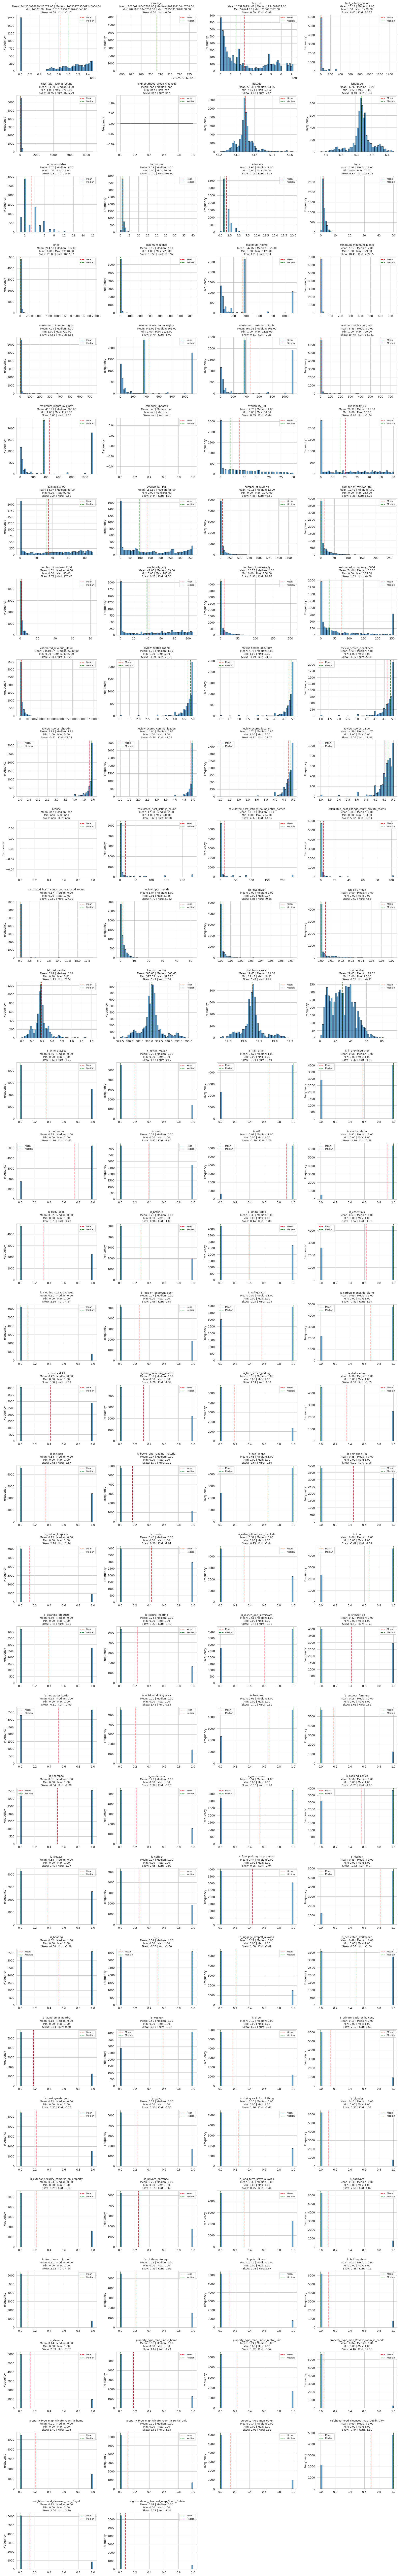

In [ ]:
# Usuń boolean_columns z numerical_cols
pure_numerical_cols = [col for col in numerical_cols if col not in boolean_columns]

print(f"Pure numerical columns (without boolean): {len(pure_numerical_cols)}")
print(f"Boolean columns: {len(boolean_columns)}")
print(f"Date columns: {len(date_columns)}")
print(f"Categorical columns: {len(categorical_cols)}")
print("="*80)

print("\n1. NUMERICAL VARIABLES (excluding boolean)")
print("="*80)

# Oblicz skośność i kurtozę
numerical_stats = pd.DataFrame({
    'skewness': data[pure_numerical_cols].skew(),
    'kurtosis': data[pure_numerical_cols].kurt()
}).round(2)

print(numerical_stats.sort_values('skewness', ascending=False))

# Wizualizacja histogramów
n_cols = 4
n_rows = int(np.ceil(len(pure_numerical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(pure_numerical_cols):
    ax = axes[idx]

    # Usuń NaN
    col_data = data[col].dropna()

    # Histogram
    ax.hist(col_data, bins=50, edgecolor='black', alpha=0.7)

    # Statystyki
    skew = col_data.skew()
    kurt = col_data.kurtosis()
    mean_val = col_data.mean()
    median_val = col_data.median()
    min_val = col_data.min()
    max_val = col_data.max()

    # Tytuł z rozszerzonymi statystykami
    ax.set_title(
        f'{col}\n'
        f'Mean: {mean_val:.2f} | Median: {median_val:.2f}\n'
        f'Min: {min_val:.2f} | Max: {max_val:.2f}\n'
        f'Skew: {skew:.2f} | Kurt: {kurt:.2f}',
        fontsize=9
    )
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

    # Dodaj linię średniej
    ax.axvline(col_data.mean(), color='red', linestyle='--', linewidth=1, label='Mean')
    ax.axvline(col_data.median(), color='green', linestyle='--', linewidth=1, label='Median')
    ax.legend(fontsize=8)

# Usuń puste subploty
for idx in range(len(pure_numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('numerical_distributions.png', dpi=100, bbox_inches='tight')
plt.show()

### 2. Boolean Variables



2. Boolean Variables


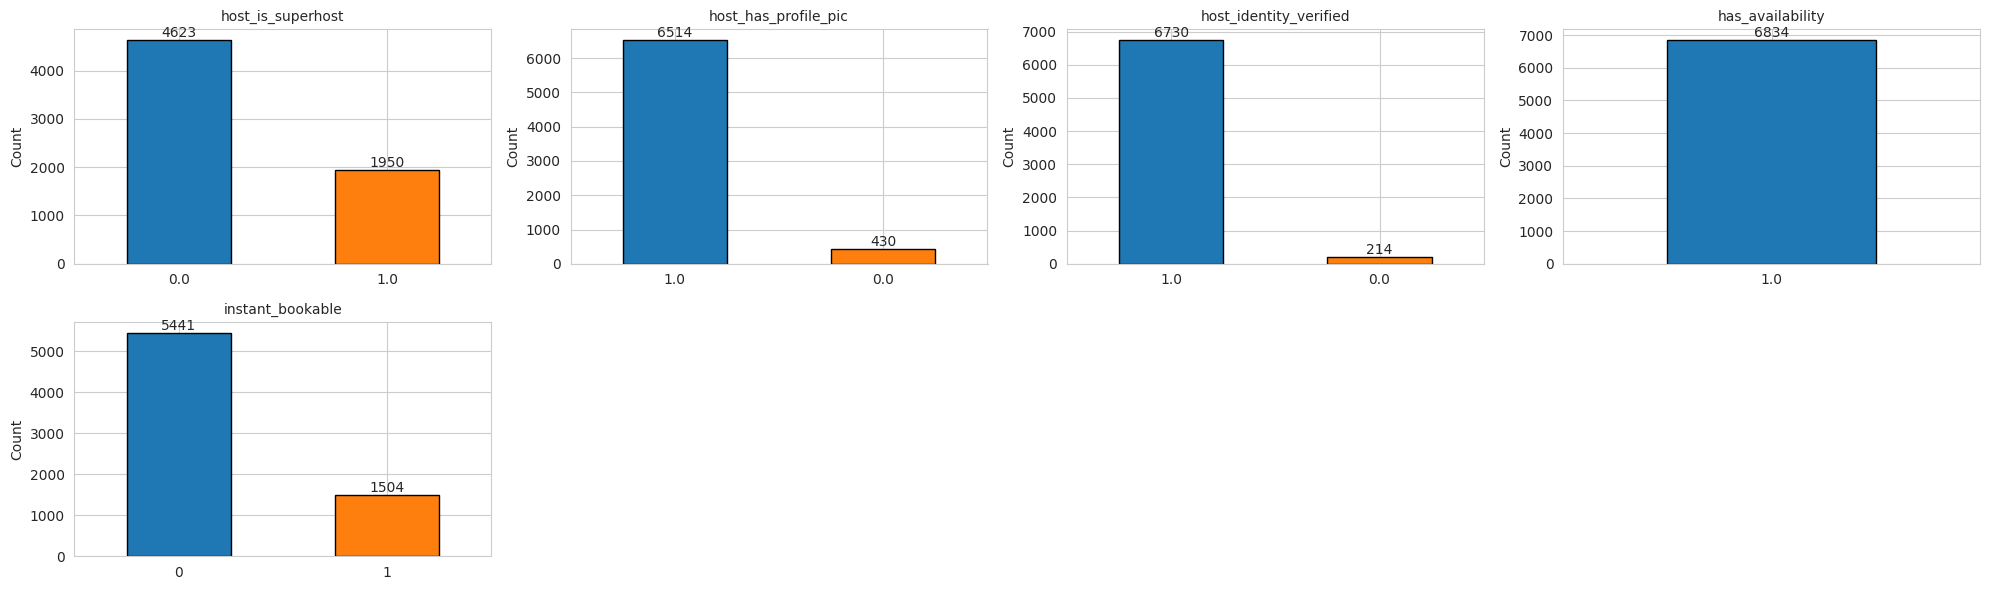

Boolean variables distribution:

host_is_superhost:
host_is_superhost
0.0    4623
1.0    1950
Name: count, dtype: int64
  % of 1s: 29.67%

host_has_profile_pic:
host_has_profile_pic
1.0    6514
0.0     430
Name: count, dtype: int64
  % of 1s: 93.81%

host_identity_verified:
host_identity_verified
1.0    6730
0.0     214
Name: count, dtype: int64
  % of 1s: 96.92%

has_availability:
has_availability
1.0    6834
Name: count, dtype: int64
  % of 1s: 100.00%

instant_bookable:
instant_bookable
0    5441
1    1504
Name: count, dtype: int64
  % of 1s: 21.66%


In [ ]:
print("\n\n2. Boolean Variables")

n_cols_bool = 4
n_rows_bool = int(np.ceil(len(boolean_columns) / n_cols_bool))

fig, axes = plt.subplots(n_rows_bool, n_cols_bool, figsize=(20, n_rows_bool*3))
axes = axes.flatten()

for idx, col in enumerate(boolean_columns):
    ax = axes[idx]

    # Zlicz wartości
    value_counts = data[col].value_counts()

    # Bar plot
    value_counts.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'], edgecolor='black')
    ax.set_title(f'{col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=0)

    # Dodaj wartości na słupkach
    for i, v in enumerate(value_counts):
        ax.text(i, v, str(v), ha='center', va='bottom')

# Usuń puste subploty
for idx in range(len(boolean_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('boolean_distributions.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"Boolean variables distribution:")
for col in boolean_columns:
    print(f"\n{col}:")
    print(data[col].value_counts())
    print(f"  % of 1s: {(data[col].sum() / data[col].count() * 100):.2f}%")

### 3. Date columns



3. DATE VARIABLES

last_scraped:
  Min: 2025-09-16 00:00:00
  Max: 2025-09-16 00:00:00
  Missing: 0 (0.00%)

host_since:
  Min: 2009-11-25 00:00:00
  Max: 2025-09-12 00:00:00
  Missing: 1 (0.01%)

calendar_last_scraped:
  Min: 2025-09-16 00:00:00
  Max: 2025-09-16 00:00:00
  Missing: 0 (0.00%)

first_review:
  Min: 2011-03-20 00:00:00
  Max: 2025-09-15 00:00:00
  Missing: 1042 (15.00%)

last_review:
  Min: 2014-11-09 00:00:00
  Max: 2025-09-15 00:00:00
  Missing: 1042 (15.00%)


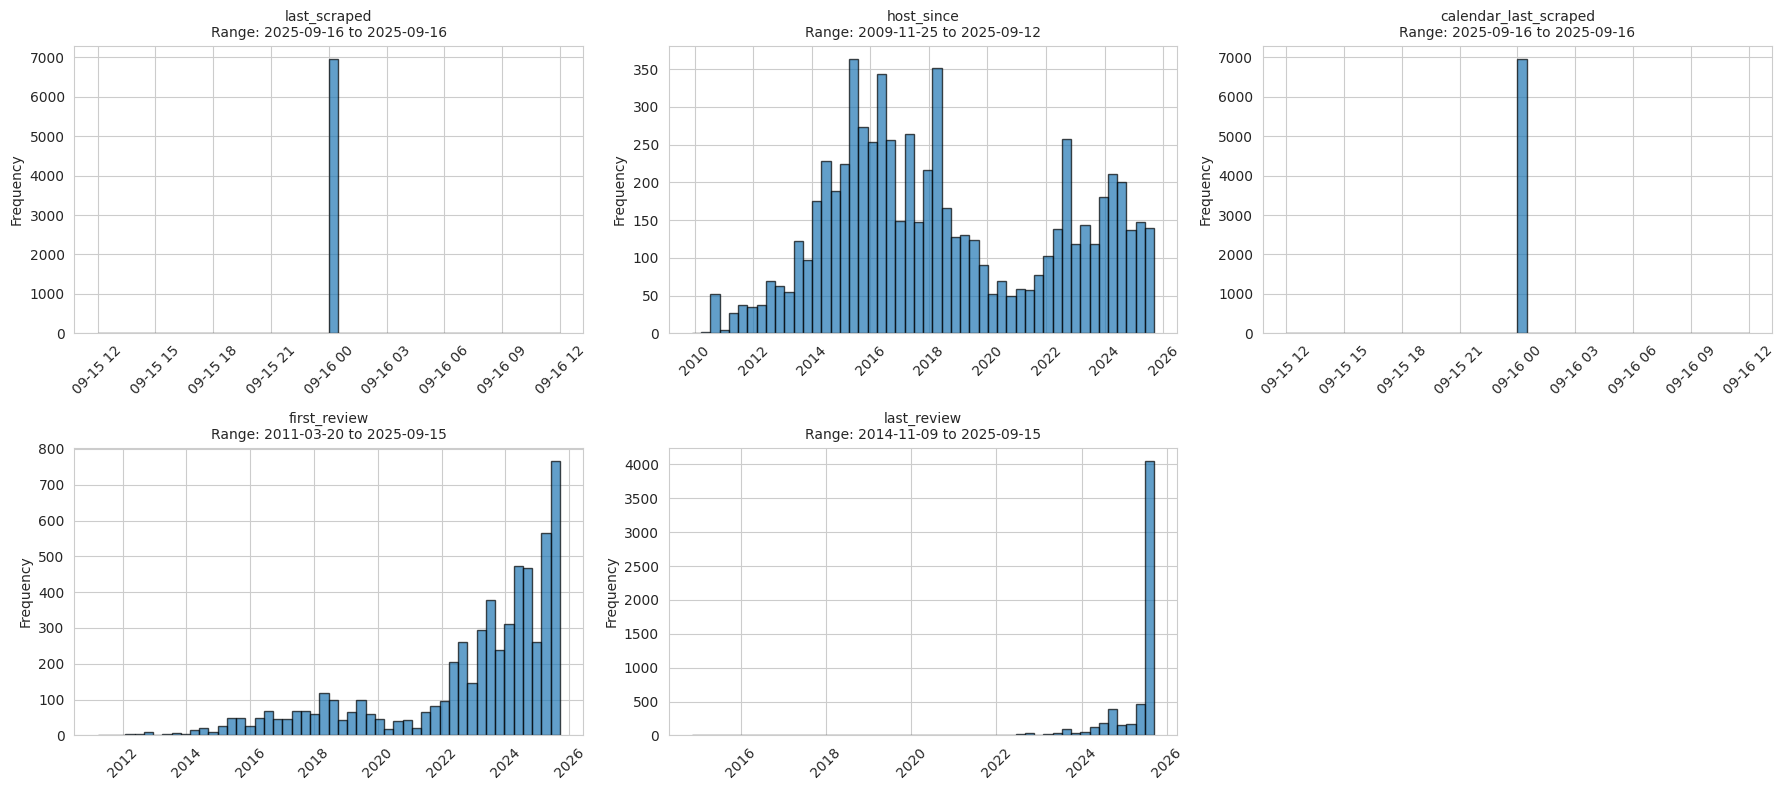

In [ ]:
print("\n\n3. DATE VARIABLES")
print("="*80)

n_cols_date = 3
n_rows_date = int(np.ceil(len(date_columns) / n_cols_date))

fig, axes = plt.subplots(n_rows_date, n_cols_date, figsize=(18, n_rows_date*4))
axes = axes.flatten()

for idx, col in enumerate(date_columns):
    ax = axes[idx]

    # Usuń NaN i sortuj
    col_data = data[col].dropna().sort_values()

    if len(col_data) > 0:
        # Histogram dat
        ax.hist(col_data, bins=50, edgecolor='black', alpha=0.7)
        ax.set_title(f'{col}\nRange: {col_data.min().date()} to {col_data.max().date()}', fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=45)

        # Statystyki
        print(f"\n{col}:")
        print(f"  Min: {col_data.min()}")
        print(f"  Max: {col_data.max()}")
        print(f"  Missing: {data[col].isnull().sum()} ({data[col].isnull().sum()/len(data)*100:.2f}%)")

# Usuń puste subploty
for idx in range(len(date_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('date_distributions.png', dpi=100, bbox_inches='tight')
plt.show()





## 4. Categorical columns

Original categorical columns: 24
Filtered categorical columns: 12
Removed: ['host_about', 'name', 'description', 'neighborhood_overview', 'amenities', 'listing_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'amenities_parsed', 'host_verifications']

Filtered list: ['source', 'host_name', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text']


4. CATEGORICAL VARIABLES

source:
  Unique values: 2
  Missing: 0 (0.00%)
  Top 5 values:
source
city scrape        5247
previous scrape    1698
Name: count, dtype: int64

host_name:
  Unique values: 1950
  Missing: 1 (0.01%)
  Top 5 values:
host_name
Anna     243
Paul     145
Lucas    145
Ian       93
David     82
Name: count, dtype: int64

host_location:
  Unique values: 252
  Missing: 1802 (25.95%)
  Top 5 values:
host_location
Dublin, Ireland            3945
County Dublin, I

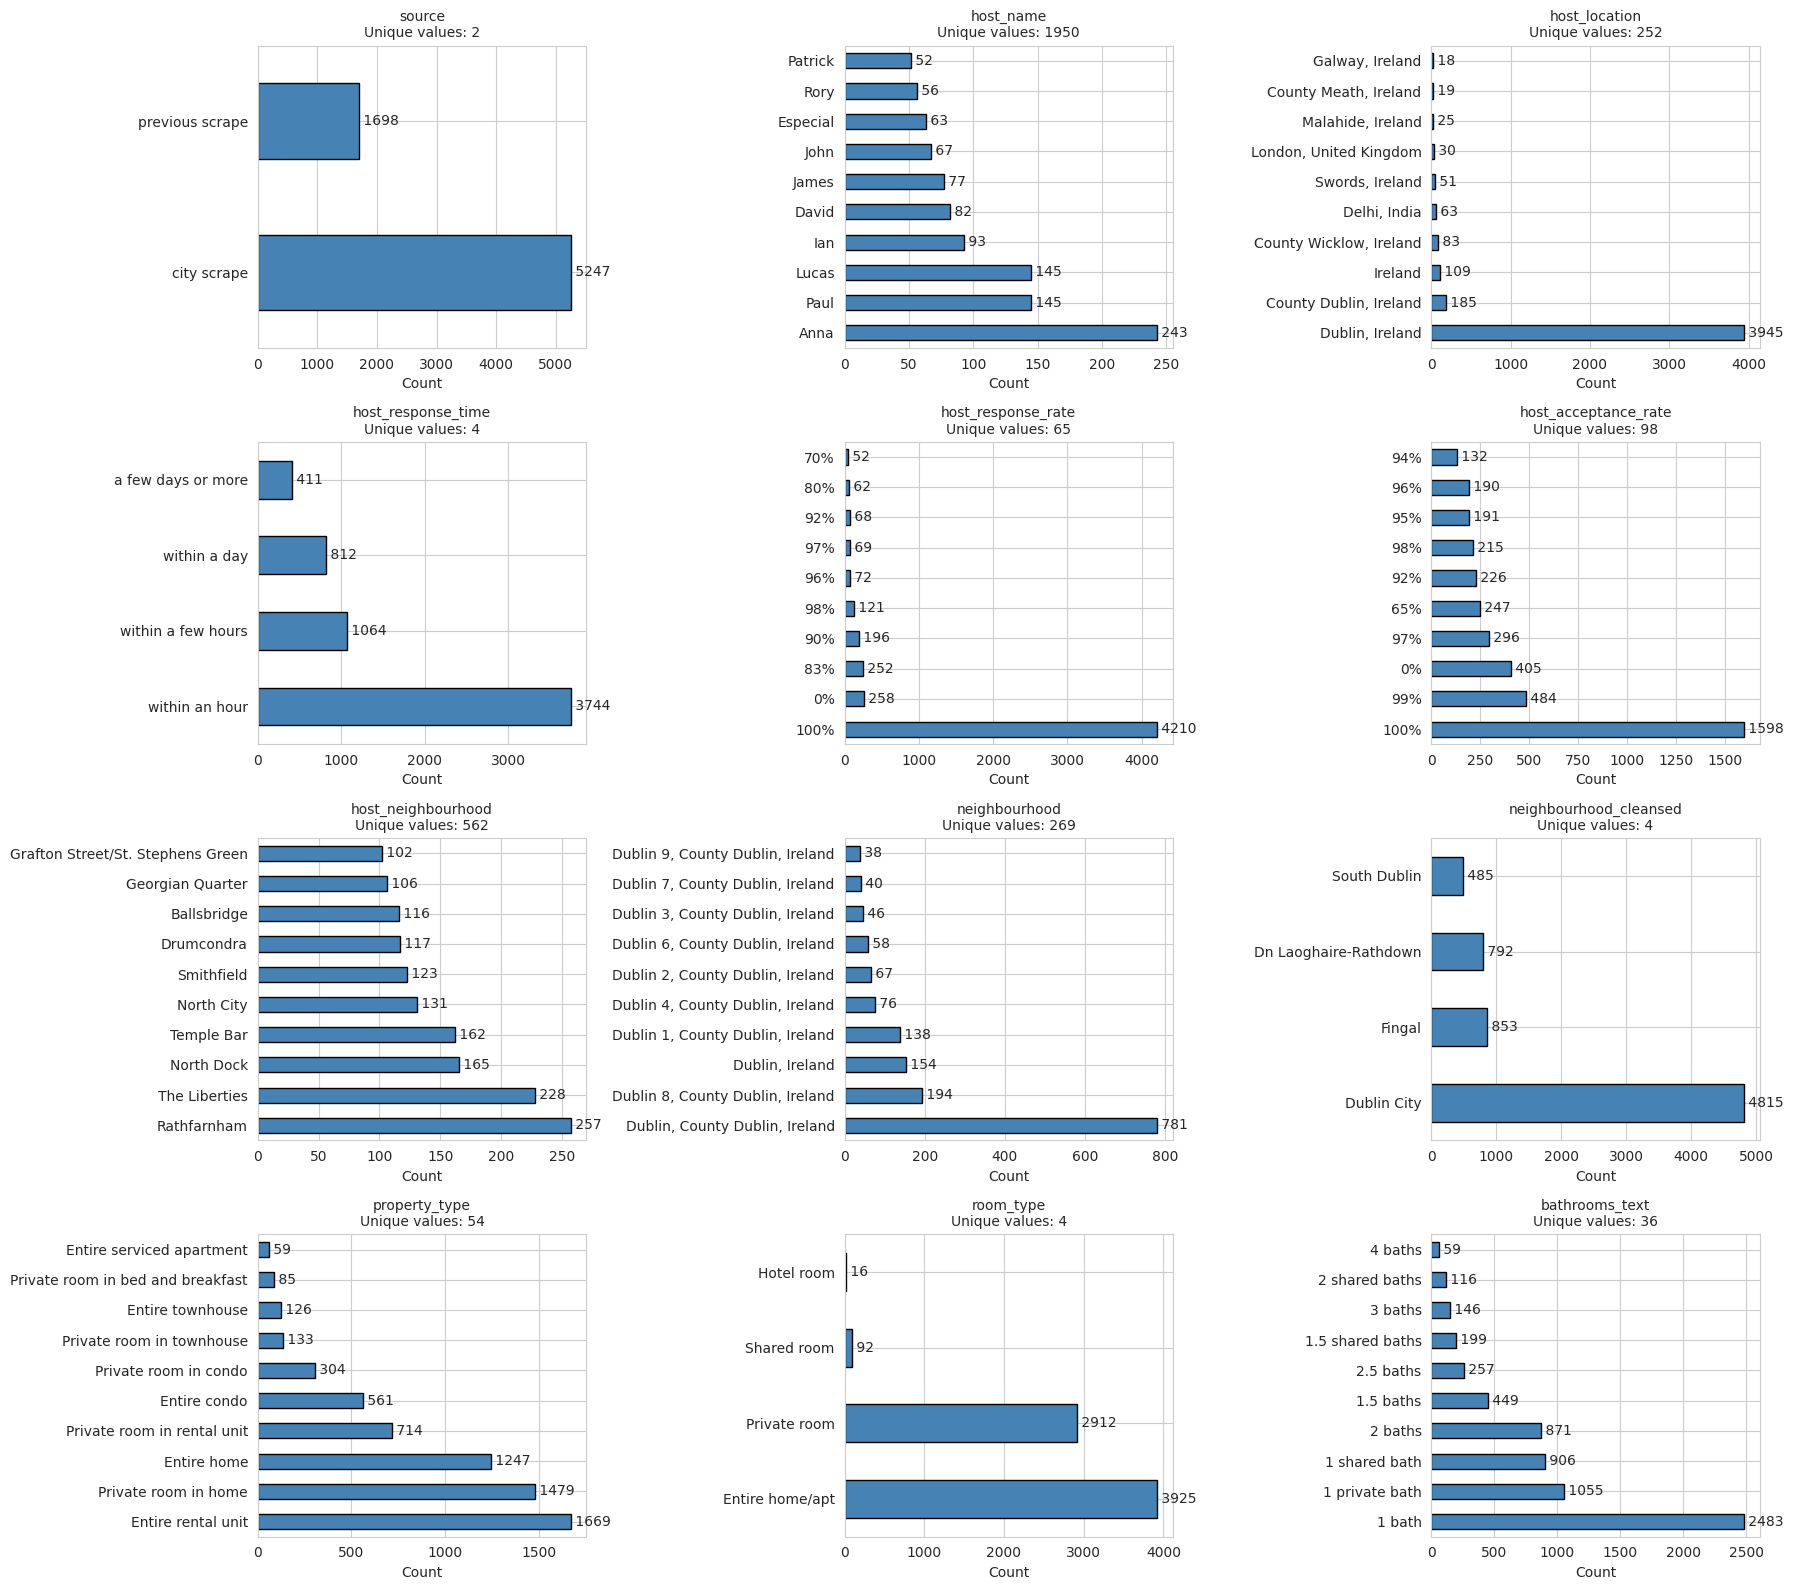

In [ ]:
# Usuń kolumny tekstowe z categorical_cols
text_columns = ['host_about', 'name', 'description', 'neighborhood_overview', 'amenities']
categorical_cols_short = [col for col in categorical_cols if col not in text_columns]

# Dodatkowo usuń kolumny które zawierają listy lub są URL-ami
exclude_lists = ['listing_url', 'picture_url', 'host_url', 'host_thumbnail_url',
                     'host_picture_url', 'amenities_parsed', 'host_verifications']

categorical_cols_short = [col for col in categorical_cols_short if col not in exclude_lists]

print(f"Original categorical columns: {len(categorical_cols)}")
print(f"Filtered categorical columns: {len(categorical_cols_short)}")
print(f"Removed: {text_columns + exclude_lists}")
print(f"\nFiltered list: {categorical_cols_short}")

# CATEGORICAL VARIABLES
print("\n\n4. CATEGORICAL VARIABLES")
print("="*80)

# Top 10 wartości dla każdej zmiennej kategorycznej
n_cols_cat = 3
n_rows_cat = int(np.ceil(len(categorical_cols_short) / n_cols_cat))

fig, axes = plt.subplots(n_rows_cat, n_cols_cat, figsize=(18, n_rows_cat*4))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols_short):
    ax = axes[idx]

    try:
        # Top 10 wartości
        top_values = data[col].value_counts().head(10)

        # Bar plot
        top_values.plot(kind='barh', ax=ax, color='steelblue', edgecolor='black')
        ax.set_title(f'{col}\nUnique values: {data[col].nunique()}', fontsize=10)
        ax.set_xlabel('Count')
        ax.set_ylabel('')

        # Dodaj wartości na słupkach
        for i, v in enumerate(top_values):
            ax.text(v, i, f' {v}', va='center')

        print(f"\n{col}:")
        print(f"  Unique values: {data[col].nunique()}")
        print(f"  Missing: {data[col].isnull().sum()} ({data[col].isnull().sum()/len(data)*100:.2f}%)")
        print(f"  Top 5 values:")
        print(top_values.head(5))
    except TypeError as e:
        print(f"\n⚠️ Skipping {col} - contains unhashable type (lists): {e}")
        ax.text(0.5, 0.5, f'{col}\n(contains lists)',
                ha='center', va='center', transform=ax.transAxes)
        ax.set_xticks([])
        ax.set_yticks([])

# Usuń puste subploty
for idx in range(len(categorical_cols_short), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=100, bbox_inches='tight')
plt.show()

### Podsumowanie

In [ ]:
# Podsumowanie skośności i kurtozy

print("\n\n" + "="*80)
print("Podsumowanie dystrybucji")
print("="*80)

print("\n Zmienne o wysokiej skośności (|skewness| > 2):")
highly_skewed = numerical_stats[abs(numerical_stats['skewness']) > 2].sort_values('skewness', ascending=False)
print(highly_skewed)

print("\n Zmienne o wysokiej kurtozie (kurtosis > 5):")
high_kurtosis = numerical_stats[numerical_stats['kurtosis'] > 5].sort_values('kurtosis', ascending=False)
print(high_kurtosis)



Podsumowanie dystrybucji

 Zmienne o wysokiej skośności (|skewness| > 2):
                                               skewness  kurtosis
host_total_listings_count                         31.97   1695.79
price                                             26.85   1067.87
minimum_minimum_nights                            18.41    439.55
minimum_nights_avg_ntm                            15.78    331.31
minimum_nights                                    15.58    315.97
bathrooms                                         14.70    491.90
maximum_minimum_nights                            14.61    286.86
calculated_host_listings_count_shared_rooms       10.60    127.98
number_of_reviews_l30d                             7.71    173.45
estimated_revenue_l365d                            7.41    146.22
beds                                               6.87    115.22
host_listings_count                                6.03     70.77
calculated_host_listings_count_private_rooms       5.92     35.14


# '8. DATA CLEANING

## Usunięcie outlierów - price

LIKWIDACJA OUTLIERÓW, po co?

Słabo modelują dane.

Odcięcie 99, 98, 95 percentyla - ok.
Podobnie odcięcie 1,2,5 percentyla.

**Ogranicza od razu cały zbiór danych - po co przerabiać dane, które będziemy i tak usuwać. **

In [ ]:
print(f"Kolumna 'price' ma: {data.price.describe()['count']} rekordów spośród {data.shape[0]} wierszy")
print(f"Kolumna 'price' jest kluczowa do modelowania i nie może mieć braków - usuwanie pustych.")

# Usuń wiersze z brakującymi danymi
data.dropna(subset=['price'], inplace=True)
# Opcjonalnie - wyświetl informacje o usuniętych wierszach
print(f"Rozmiar data po usunięciu braków: {data.shape}")

all_data=data.copy()

data.price.describe()

Kolumna 'price' ma: 5244.0 rekordów spośród 6945 wierszy
Kolumna 'price' jest kluczowa do modelowania i nie może mieć braków - usuwanie pustych.
Rozmiar data po usunięciu braków: (5244, 160)


count     5244.000000
mean       204.497712
std        400.981542
min         16.000000
25%         89.000000
50%        137.000000
75%        232.000000
max      19140.000000
Name: price, dtype: float64

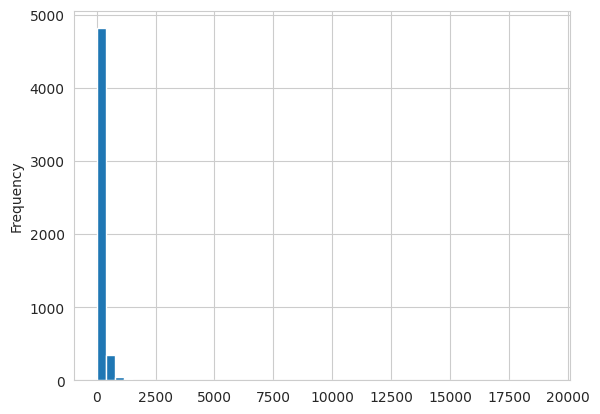

In [ ]:
# Mhm, we have outliers which seem to be to-be-deleted-errors
data.price.plot.hist(bins=50)
plt.show()

In [ ]:
# Getting rid of outliers
data = all_data.copy()
threshold_top=(np.percentile(data.price, 95))
threshold_bottom=(np.percentile(data.price, 5))
print("95% properties have a price lower than {0: .2f}".format(threshold_top))
print("95% properties have a price higher than {0: .2f}".format(threshold_bottom))
data_cut = data[(data.price <= threshold_top) & (data.price > threshold_bottom)]
all_data = data.copy()
data = data_cut.copy()
print(data.shape)

95% properties have a price lower than  489.00
95% properties have a price higher than  55.00
(4714, 160)


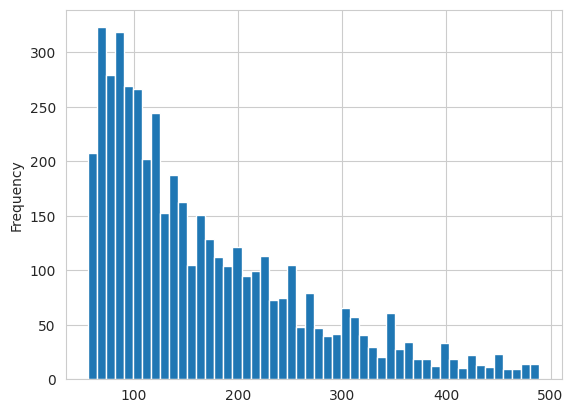

In [ ]:
# po usunięciu outlierów
data.price.plot.hist(bins=50)
plt.show()

In [ ]:
data.price.describe()

count    4714.000000
mean      167.794654
std        96.046323
min        56.000000
25%        92.000000
50%       137.000000
75%       221.000000
max       489.000000
Name: price, dtype: float64

## Zastępowanie braków
Zastąpienie brakujących danych:
* dane numeryczne - zastąpienie średnią
* dane kategoryczne - zastąpienie najczęściej występującą



In [ ]:
# Usuwa kolumny całkowicie puste
data = data.dropna(axis=1, how='all')
print(data.shape)

(4714, 157)


In [ ]:
from sklearn.impute import SimpleImputer

numeric_cols     = data.select_dtypes(include=['number']).columns
date_cols     = data.select_dtypes(include=['datetime64']).columns
# categorical_cols_short = data.select_dtypes(include=['object', 'category']).columns

numeric_imputer     = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer to numeric columns
data[numeric_cols]     = numeric_imputer.fit_transform(data[numeric_cols])
data[categorical_cols_short] = categorical_imputer.fit_transform(data[categorical_cols_short])


for col in date_cols:
    data[col].fillna(pd.Timestamp('2026-01-01'), inplace=True) # konkretna data

/tmp/ipython-input-3815431556.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(pd.Timestamp('2026-01-01'), inplace=True) # konkretna data


### Weryfikacja obecności braków

In [ ]:
# Sprawdzenie braków
missing = pd.DataFrame({
    'Missing_Count': data.isnull().sum(),
    'Percent': (data.isnull().sum() / len(data)) * 100
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
missing['Percent'] = missing['Percent'].apply(lambda x: f'{x:.2f}%')

print(missing)

                       Missing_Count Percent
neighborhood_overview           3004  63.73%
host_about                      2804  59.48%
description                       69   1.46%
host_thumbnail_url                 1   0.02%
host_picture_url                   1   0.02%
host_verifications                 1   0.02%


In [ ]:
data.head(5).T

0                                                  3                                                  7                                                  8                                                  9
id                                                                                       44077.0                                           162809.0                                           292757.0                                           302554.0                                           302634.0
listing_url                                                   https://www.airbnb.com/rooms/44077                https://www.airbnb.com/rooms/162809                https://www.airbnb.com/rooms/292757                https://www.airbnb.com/rooms/302554                https://www.airbnb.com/rooms/302634
scrape_id                                                                       20250916040708.0                                   20250916040708.0                                   20250916040708.0                                   20250916040708.0                                   20250916040708.0
last_scraped                                                                 2025-09-16 00:00:00                                2025-09-16 00:00:00                                2025-09-16 00:00:00                                2025-09-16 00:00:00                                2025-09-16 00:00:00
source                                                                               city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape
name                                                         cosy comfortable Irish cottage twin                 5.5 miles south of Dublin City :^)    Old World Converted Stables with Swimming Pool.        Peaceful retreat for 5 - excellent location    Studio sleeps 2 city ctr 10 mins - Molly Malone
description                                    Our house is a cosy comfortable cottage  with ...  A nice place to relax after the bustle of the ...  The following is what past guests have said th...  This apartment is quiet and peaceful and is a ...  We call this the Molly Malone studio which is ...
neighborhood_overview                          I like our neighbourhood as there is no shorta...  Close to the sea, hill walks and the city - vi...  Our house is located at the gate of the famous...  This street is a beautifully tree lined street...  This street is a beautifully tree lined street...
picture_url                                    https://a0.muscache.com/pictures/525706/050a3a...  https://a0.muscache.com/pictures/86694529/c07b...  https://a0.muscache.com/pictures/c0f316d1-c7f1...  https://a0.muscache.com/pictures/3c1a66d6-ffc1...  https://a0.muscache.com/pictures/10910884/fac3...
host_id                                                                                 193005.0                                           777681.0                                          1515549.0                                          1557844.0                                          1557844.0
host_url                                                https://www.airbnb.com/users/show/193005           https://www.airbnb.com/users/show/777681          https://www.airbnb.com/users/show/1515549          https://www.airbnb.com/users/show/1557844          https://www.airbnb.com/users/show/1557844
host_name                                                                                 Teresa                                             Robbie                                              Sarah                                     Liam And Fiona                                     Liam And Fiona
host_since                                                                   2010-08-06 00:00:00                                2011-07-04 00:00:00                                201

# '9. WYKRESY KORELACJI



## Wykresy korelacji Pearsona dla zmiennych numerycznych

Number of numeric variables: 119
Numeric columns: ['host_id', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'lat_dist_mean', 'lon_dist_mean', 'lat_dist_ce

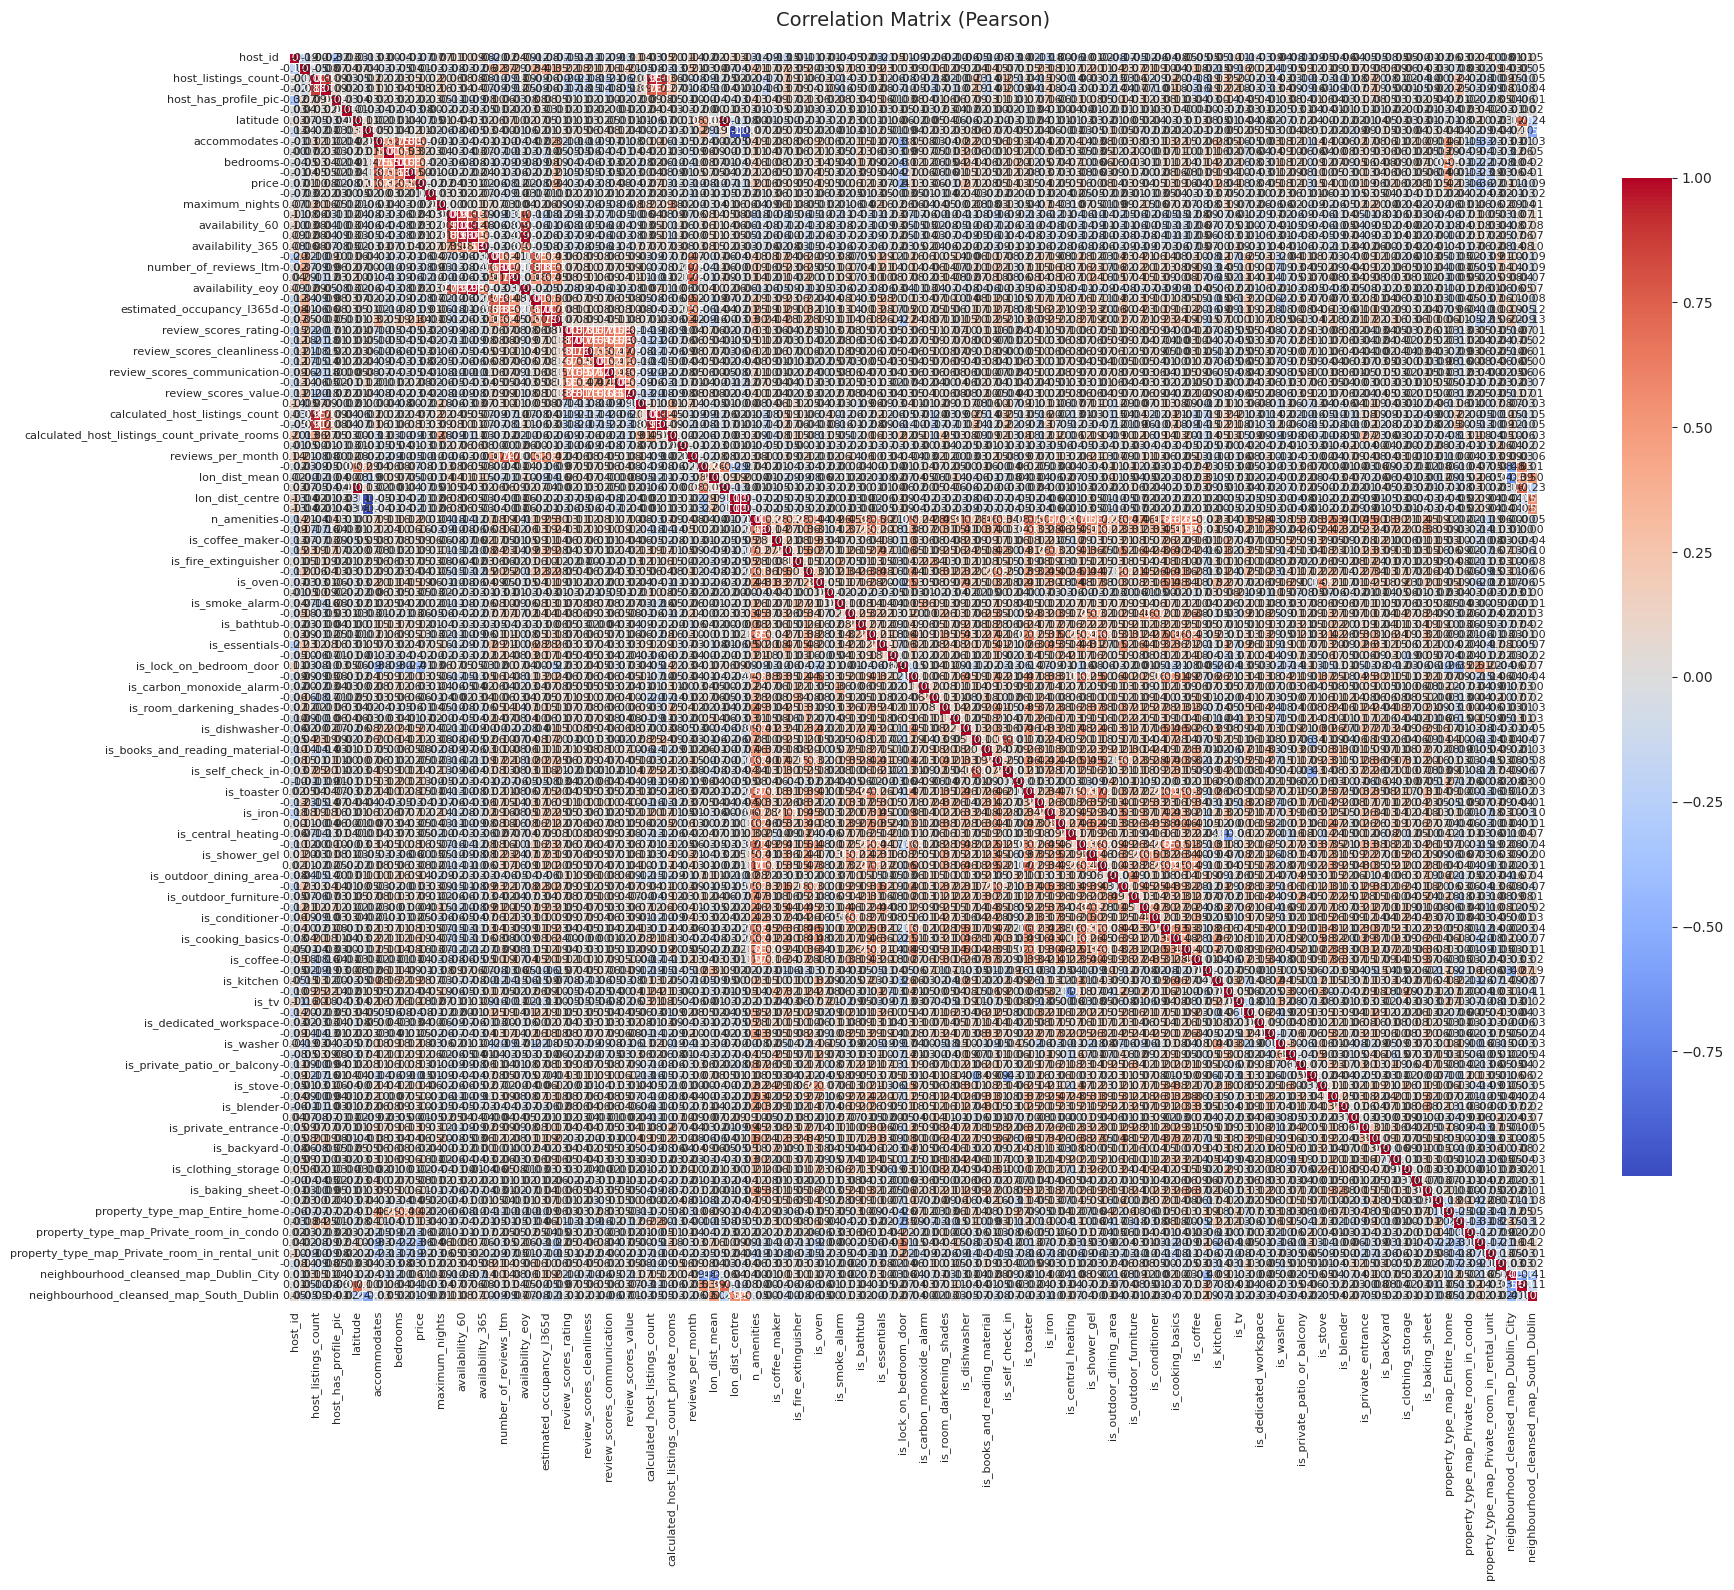


PAIRPLOT: Top variables correlated with 'price'
price                                     1.000000
accommodates                              0.668602
bedrooms                                  0.589832
beds                                      0.495549
property_type_map_Entire_home             0.415581
is_lock_on_bedroom_door                   0.413350
property_type_map_Private_room_in_home    0.358274
estimated_revenue_l365d                   0.335379
bathrooms                                 0.323659
is_kitchen                                0.282531
Name: price, dtype: float64


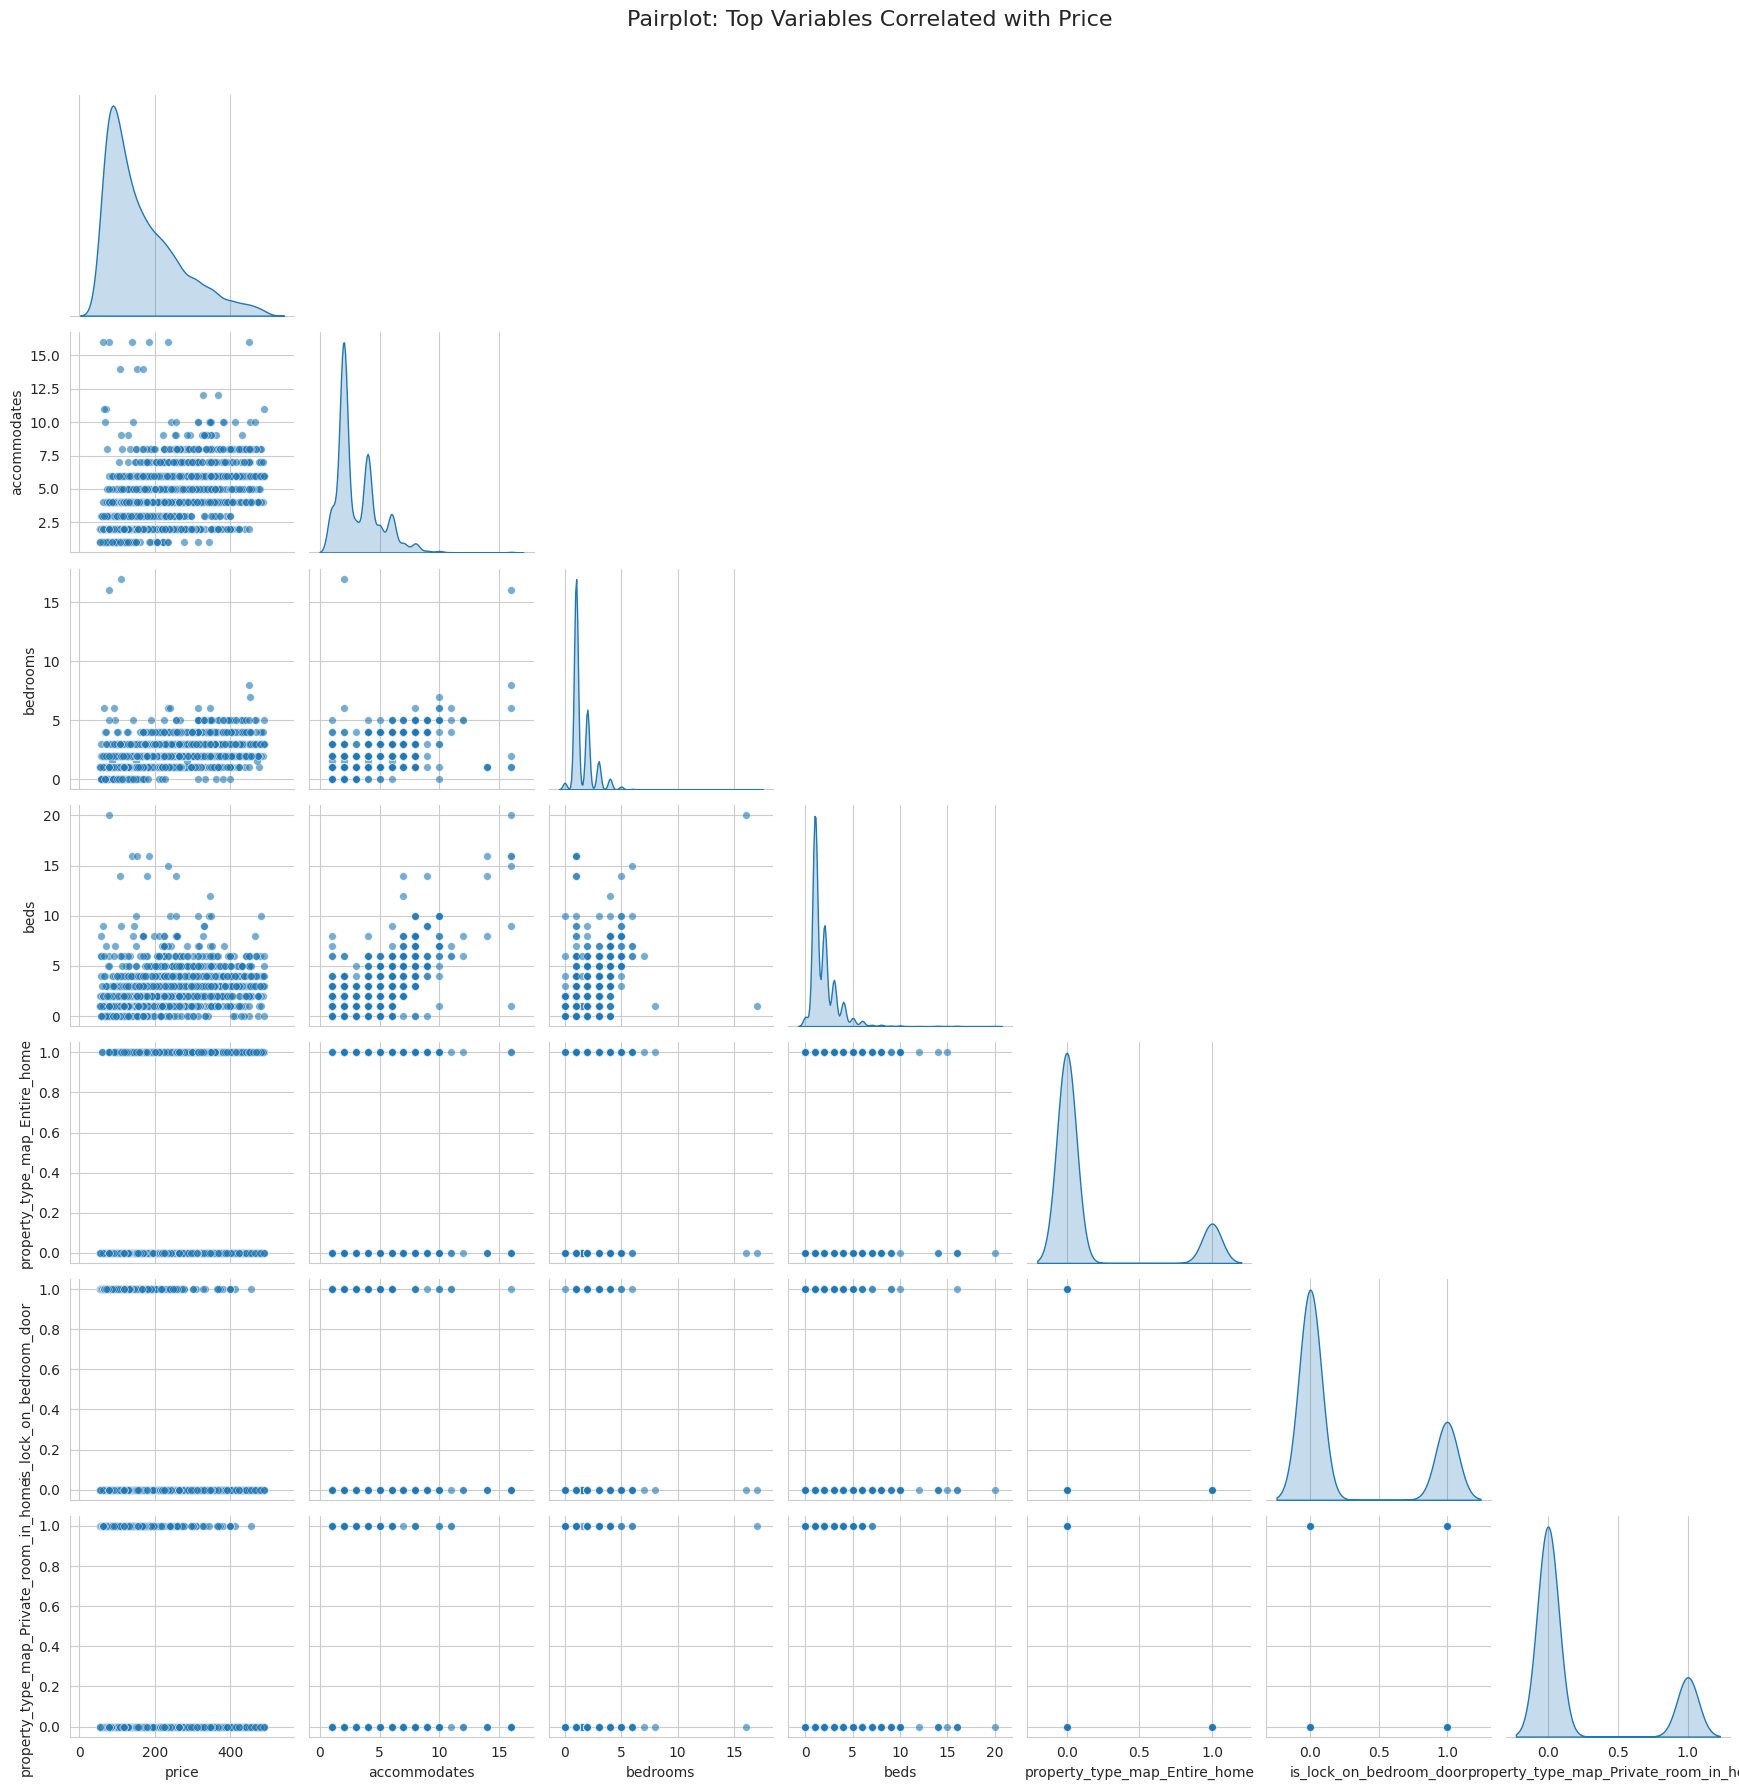


STRONG CORRELATIONS (|r| > 0.7)
longitude                                <-> lon_dist_centre                         : -1.0000
lon_dist_centre                          <-> dist_from_center                        :  0.9995
longitude                                <-> dist_from_center                        : -0.9995
latitude                                 <-> lat_dist_centre                         :  0.9978
availability_90                          <-> availability_eoy                        :  0.9822
availability_60                          <-> availability_90                         :  0.9562
host_listings_count                      <-> calculated_host_listings_count          :  0.9476
calculated_host_listings_count           <-> calculated_host_listings_count_entire_homes:  0.9324
availability_60                          <-> availability_eoy                        :  0.9215
host_listings_count                      <-> calculated_host_listings_count_entire_homes:  0.9087
availabilit

In [ ]:
# Wykluczamy te zmienne
exclude_vars = ['id', 'scrape_id', 'minimum_minimum_nights', 'maximum_minimum_nights',
                'minimum_maximum_nights', 'maximum_maximum_nights',
                'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability']

# Wybierz zmienne numeryczne (bez dat) i wykluczając określone kolumny
numeric_cols = [col for col in data.select_dtypes(include=['number']).columns
                if col not in exclude_vars]

# numeric_cols = data.select_dtypes(include=['number']).columns

print(f"Number of numeric variables: {len(numeric_cols)}")
print(f"Numeric columns: {list(numeric_cols)}")

# =============================================================================
# 1. MACIERZ KORELACJI PEARSONA
# =============================================================================
correlation_matrix = data[numeric_cols].corr(method='pearson')

print("\n" + "="*80)
print("CORRELATION MATRIX (Pearson)")
print("="*80)
print(correlation_matrix)

# Znajdź najsilniejsze korelacje (bez diagonali)
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        correlation_pairs.append((col1, col2, corr_value))

# Sortuj po wartości bezwzględnej
correlation_pairs_sorted = sorted(correlation_pairs, key=lambda x: abs(x[2]), reverse=True)

print("\n" + "="*80)
print("TOP 20 STRONGEST CORRELATIONS")
print("="*80)
for col1, col2, corr in correlation_pairs_sorted[:20]:
    print(f"{col1:40s} <-> {col2:40s}: {corr:7.4f}")

# =============================================================================
# 2. HEATMAPA KORELACJI
# =============================================================================
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix,
            annot=True,  # Pokaż wartości
            fmt='.2f',   # Format 2 miejsca po przecinku
            cmap='coolwarm',  # Kolor: czerwony = pozytywna, niebieski = negatywna
            center=0,    # Wyśrodkuj skalę na 0
            square=True, # Kwadratowe komórki
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 8})  # Czcionka w komórkach: 10 -> 8

plt.title('Correlation Matrix (Pearson)', fontsize=14, pad=20)  # Tytuł: 16 -> 14
plt.xticks(fontsize=8)  # Etykiety osi X
plt.yticks(fontsize=8)  # Etykiety osi Y
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# =============================================================================
# 3. PAIRPLOT - dla wybranych zmiennych (wszystkie byłyby nieczytelne)
# =============================================================================
# Wybierz najważniejsze zmienne (np. top 6 najbardziej skorelowanych z price)
if 'price' in numeric_cols:
    # Korelacje z price
    price_correlations = correlation_matrix['price'].abs().sort_values(ascending=False)
    top_vars = price_correlations.head(7).index.tolist()  # price + 6 innych

    print("\n" + "="*80)
    print(f"PAIRPLOT: Top variables correlated with 'price'")
    print("="*80)
    print(price_correlations.head(10))

    # Pairplot
    pairplot_data = data[top_vars].copy()

    sns.pairplot(pairplot_data,
                 diag_kind='kde',  # Rozkład na diagonali
                 plot_kws={'alpha': 0.6, 's': 30},  # Przezroczystość i rozmiar punktów
                 corner=True)  # Pokaż tylko dolny trójkąt

    plt.suptitle('Pairplot: Top Variables Correlated with Price', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.savefig('pairplot_top_vars.png', dpi=150, bbox_inches='tight')
    plt.show()

else:
    # Jeśli nie ma price, wybierz 6 pierwszych zmiennych
    selected_vars = list(numeric_cols[:6])

    print("\n" + "="*80)
    print(f"PAIRPLOT: First 6 numeric variables")
    print("="*80)

    pairplot_data = data[selected_vars].copy()

    sns.pairplot(pairplot_data,
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 's': 30},
                 corner=True)

    plt.suptitle('Pairplot: Selected Numeric Variables', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.savefig('pairplot_selected_vars.png', dpi=150, bbox_inches='tight')
    plt.show()

# =============================================================================
# 4. DODATKOWA ANALIZA - Silne korelacje (|r| > 0.7)
# =============================================================================
print("\n" + "="*80)
print("STRONG CORRELATIONS (|r| > 0.7)")
print("="*80)
strong_corr = [(col1, col2, corr) for col1, col2, corr in correlation_pairs_sorted
               if abs(corr) > 0.7]

if strong_corr:
    for col1, col2, corr in strong_corr:
        print(f"{col1:40s} <-> {col2:40s}: {corr:7.4f}")
else:
    print("No strong correlations found (|r| > 0.7)")

## Korelacja V Cramera

Categorical columns: 19
Numeric columns: 119

CRAMÉR'S V - CATEGORICAL vs CATEGORICAL
Processing listing_url... (1/19)
Processing source... (2/19)
Processing picture_url... (3/19)
Processing host_url... (4/19)
Processing host_name... (5/19)
Processing host_location... (6/19)
Processing host_response_time... (7/19)
Processing host_response_rate... (8/19)
Processing host_acceptance_rate... (9/19)
Processing host_thumbnail_url... (10/19)
Processing host_picture_url... (11/19)
Processing host_neighbourhood... (12/19)
Processing host_verifications... (13/19)
Processing neighbourhood... (14/19)
Processing neighbourhood_cleansed... (15/19)
Processing property_type... (16/19)
Processing room_type... (17/19)
Processing bathrooms_text... (18/19)
Processing amenities_parsed... (19/19)
                        listing_url  source  picture_url  host_url  host_name  host_location  host_response_time  host_response_rate  host_acceptance_rate  host_thumbnail_url  host_picture_url  host_neighbourhood  h

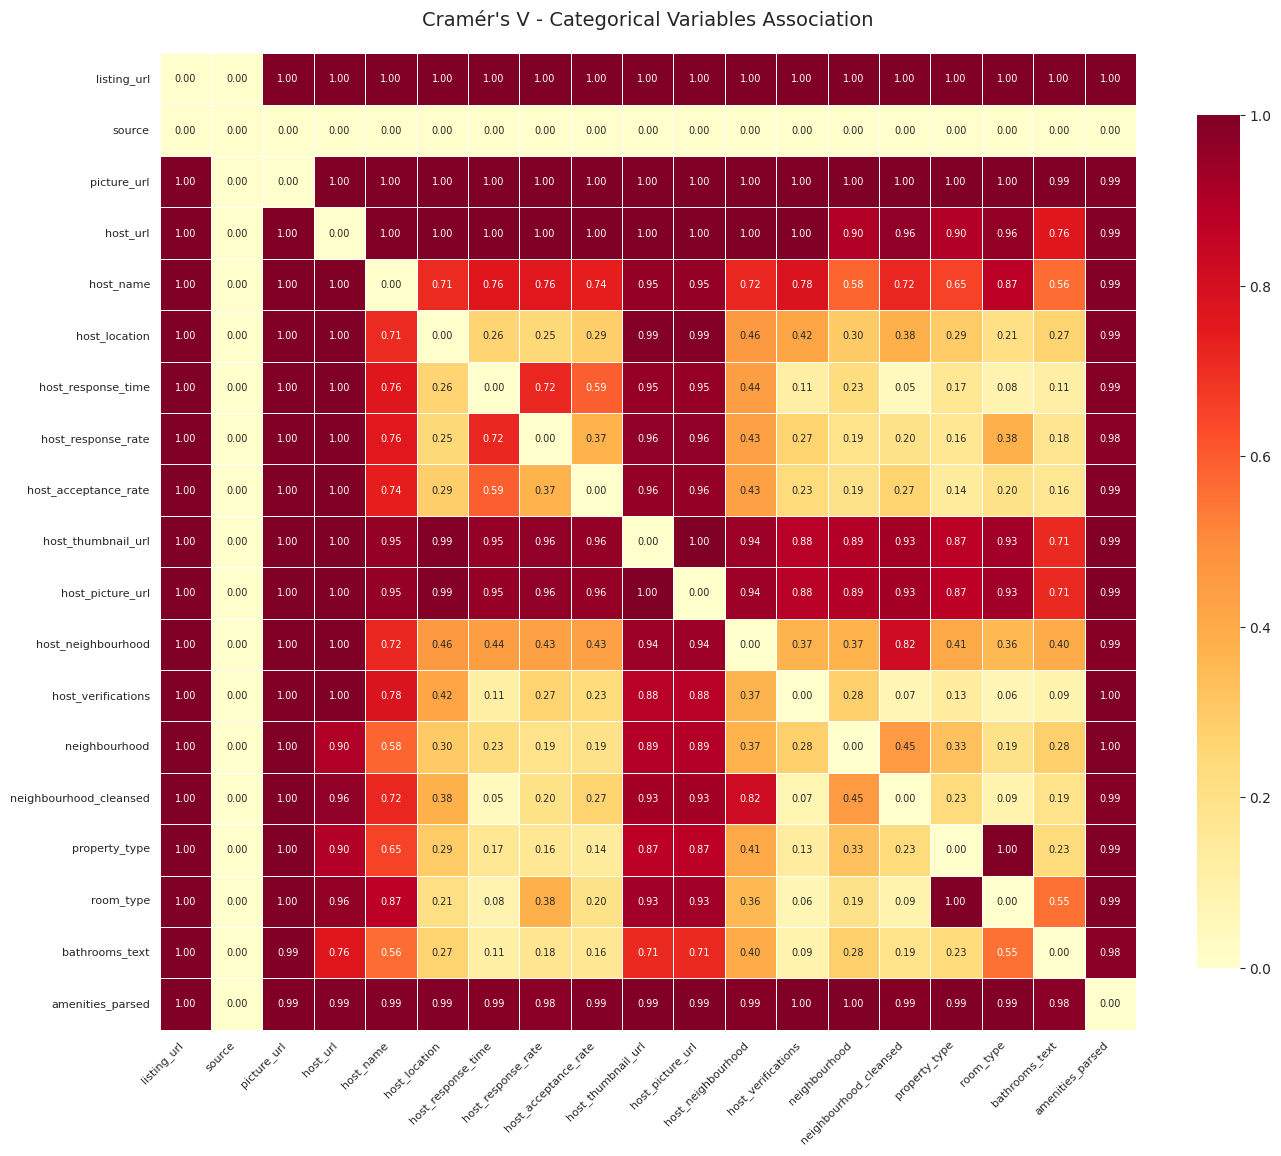


R² - CATEGORICAL vs NUMERIC (Linear Regression)
Processing listing_url...
Processing source...
Processing picture_url...
Processing host_url...
Processing host_name...
Processing host_location...
Processing host_response_time...
Processing host_response_rate...
Processing host_acceptance_rate...
Processing host_thumbnail_url...
Processing host_picture_url...
Processing host_neighbourhood...
Processing host_verifications...
Processing neighbourhood...
Processing neighbourhood_cleansed...
Processing property_type...
Processing room_type...
Processing bathrooms_text...
Processing amenities_parsed...
                         host_id  host_is_superhost  host_listings_count  host_total_listings_count  host_has_profile_pic  host_identity_verified  latitude  longitude  accommodates  bathrooms  bedrooms      beds     price  minimum_nights  maximum_nights  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  avail

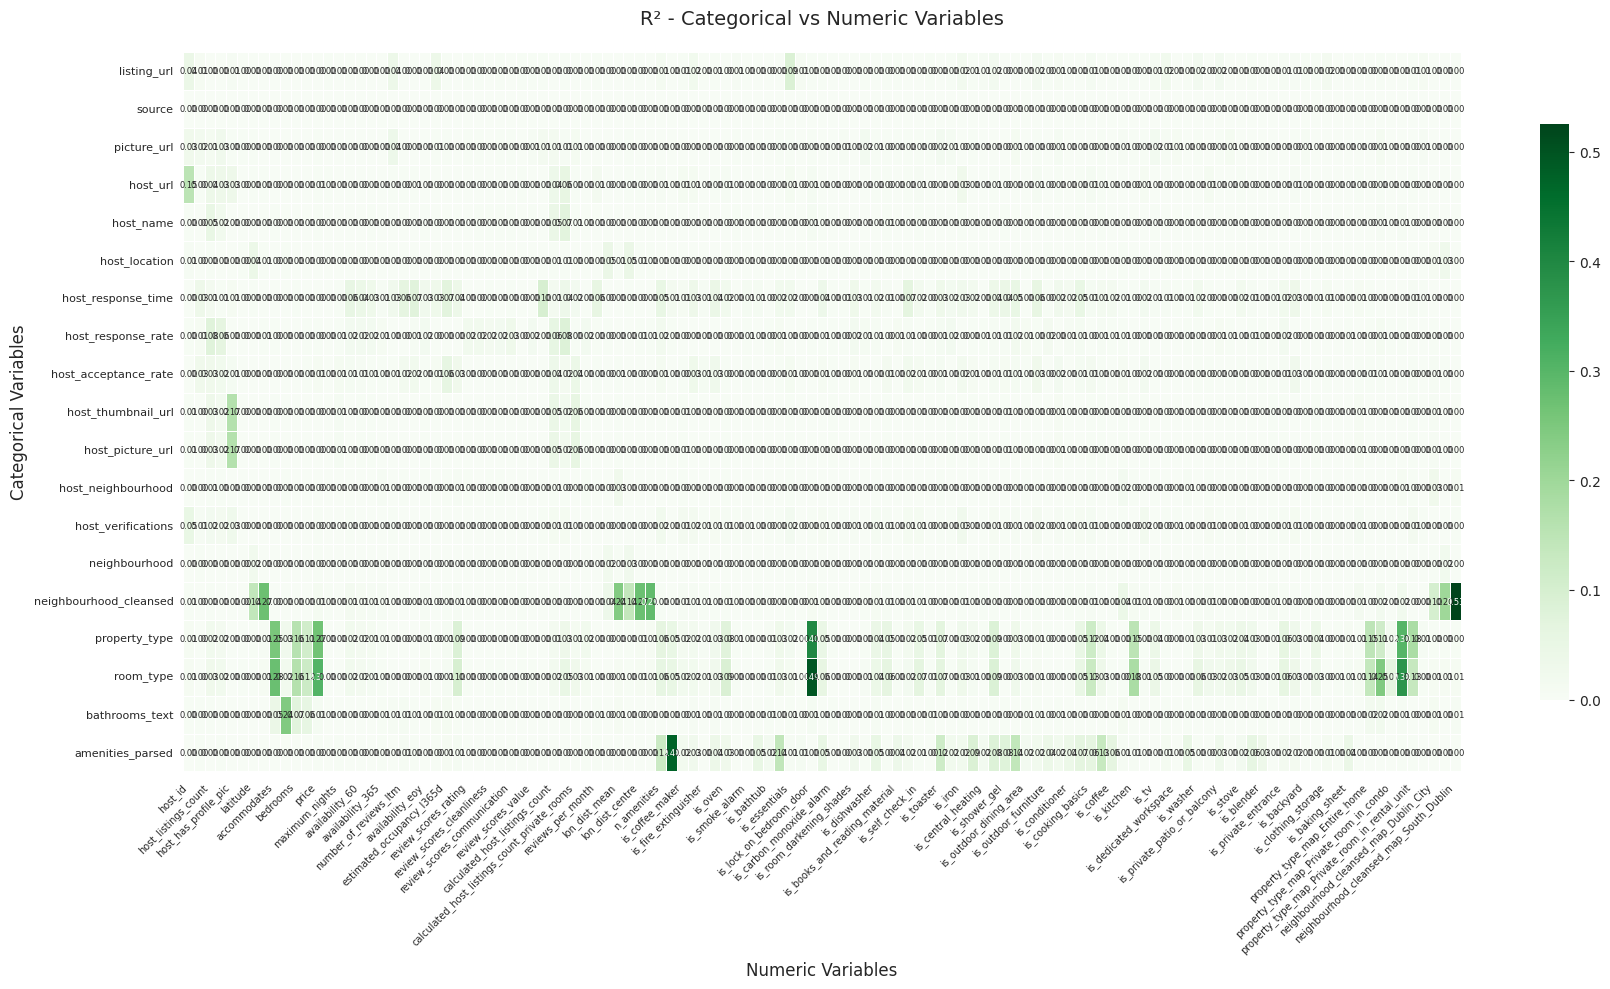


BOXPLOTS - Top 6 Categorical vs Numeric associations


TypeError: unhashable type: 'list'

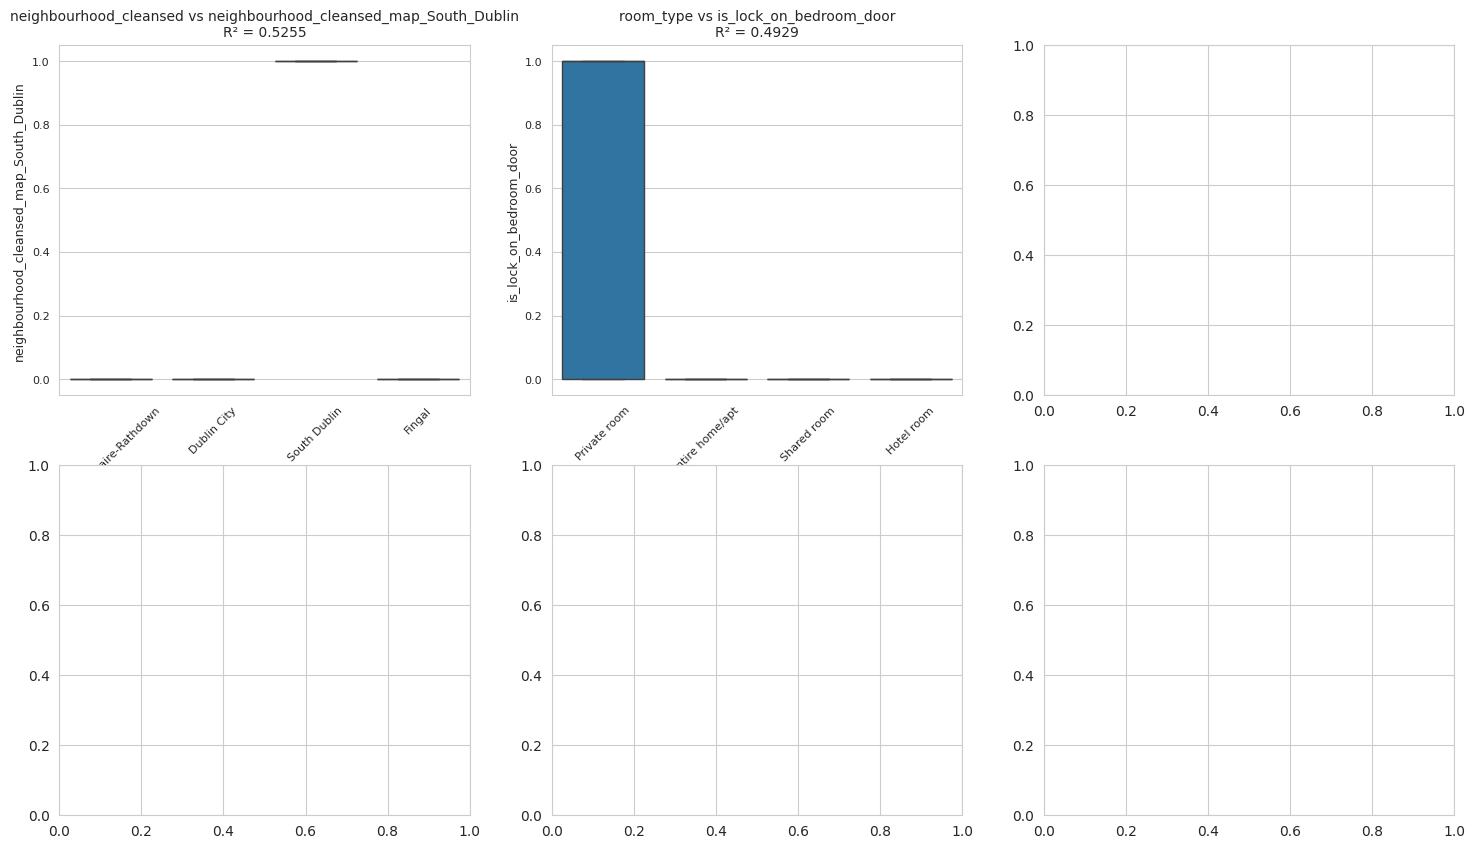

In [ ]:
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Usuń zmienne tekstowe z categorical_cols
text_columns = ['host_about', 'name', 'description', 'neighborhood_overview', 'amenities', ]
categoric_cols_filtered = [col for col in categoric_cols if col not in text_columns]

print(f"Categorical columns: {len(categoric_cols_filtered)}")
print(f"Numeric columns: {len(numeric_cols)}")

# =============================================================================
# 1. WSPÓŁCZYNNIK V CRAMÉRA (Categorical vs Categorical)
# =============================================================================
def cramers_v(x, y):
    """Oblicz współczynnik V Craméra dla dwóch zmiennych kategorycznych"""
    try:
        # Konwertuj na string aby uniknąć problemów z typami
        x_str = x.astype(str)
        y_str = y.astype(str)

        confusion_matrix = pd.crosstab(x_str, y_str)
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        min_dim = min(confusion_matrix.shape) - 1
        if min_dim == 0:
            return 0
        return np.sqrt(chi2 / (n * min_dim))
    except:
        return 0

print("\n" + "="*80)
print("CRAMÉR'S V - CATEGORICAL vs CATEGORICAL")
print("="*80)

# Macierz Craméra V
cramers_matrix = pd.DataFrame(
    np.zeros((len(categoric_cols_filtered), len(categoric_cols_filtered))),
    index=categoric_cols_filtered,
    columns=categoric_cols_filtered
)

for i, col1 in enumerate(categoric_cols_filtered):
    print(f"Processing {col1}... ({i+1}/{len(categoric_cols_filtered)})")
    for j, col2 in enumerate(categoric_cols_filtered):
        if i <= j:
            # Usuń NaN przed obliczeniem
            valid_data = data[[col1, col2]].dropna()
            if len(valid_data) > 10:  # Minimum 10 obserwacji
                v_value = cramers_v(valid_data[col1], valid_data[col2])
                cramers_matrix.loc[col1, col2] = v_value
                cramers_matrix.loc[col2, col1] = v_value

print(cramers_matrix)

# Znajdź najsilniejsze zależności
cramers_pairs = []
for i in range(len(cramers_matrix.columns)):
    for j in range(i+1, len(cramers_matrix.columns)):
        col1 = cramers_matrix.columns[i]
        col2 = cramers_matrix.columns[j]
        v_value = cramers_matrix.iloc[i, j]
        cramers_pairs.append((col1, col2, v_value))

cramers_pairs_sorted = sorted(cramers_pairs, key=lambda x: x[2], reverse=True)

print("\n" + "="*80)
print("TOP 15 STRONGEST ASSOCIATIONS (Cramér's V)")
print("="*80)
for col1, col2, v in cramers_pairs_sorted[:15]:
    print(f"{col1:35s} <-> {col2:35s}: {v:6.4f}")

# Heatmapa Craméra V
plt.figure(figsize=(14, 12))
sns.heatmap(cramers_matrix.astype(float),
            annot=True,
            fmt='.2f',
            cmap='YlOrRd',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 7})

plt.title("Cramér's V - Categorical Variables Association", fontsize=14, pad=20)
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig('cramers_v_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# =============================================================================
# 2. WSPÓŁCZYNNIK R² (Categorical vs Numeric)
# =============================================================================
print("\n" + "="*80)
print("R² - CATEGORICAL vs NUMERIC (Linear Regression)")
print("="*80)

# Macierz R²
r2_matrix = pd.DataFrame(
    np.zeros((len(categoric_cols_filtered), len(numeric_cols))),
    index=categoric_cols_filtered,
    columns=numeric_cols
)

le = LabelEncoder()

for cat_col in categoric_cols_filtered:
    print(f"Processing {cat_col}...")
    for num_col in numeric_cols:
        try:
            # Usuń NaN
            valid_data = data[[cat_col, num_col]].dropna()

            if len(valid_data) > 10:  # Minimum 10 obserwacji
                # Zakoduj zmienną kategoryczną
                X = le.fit_transform(valid_data[cat_col].astype(str)).reshape(-1, 1)
                y = valid_data[num_col].values

                # Model liniowy
                lr = LinearRegression()
                lr.fit(X, y)
                r2 = lr.score(X, y)
                r2_matrix.loc[cat_col, num_col] = max(0, r2)
        except Exception as e:
            r2_matrix.loc[cat_col, num_col] = 0

print(r2_matrix)

# Znajdź najsilniejsze zależności
r2_pairs = []
for cat_col in r2_matrix.index:
    for num_col in r2_matrix.columns:
        r2_value = r2_matrix.loc[cat_col, num_col]
        r2_pairs.append((cat_col, num_col, r2_value))

r2_pairs_sorted = sorted(r2_pairs, key=lambda x: x[2], reverse=True)

print("\n" + "="*80)
print("TOP 20 STRONGEST ASSOCIATIONS (R²)")
print("="*80)
for cat_col, num_col, r2 in r2_pairs_sorted[:20]:
    print(f"{cat_col:35s} -> {num_col:35s}: R²={r2:6.4f}")

# Heatmapa R²
plt.figure(figsize=(18, 10))
sns.heatmap(r2_matrix.astype(float),
            annot=True,
            fmt='.2f',
            cmap='Greens',
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 6})

plt.title("R² - Categorical vs Numeric Variables", fontsize=14, pad=20)
plt.xlabel("Numeric Variables", fontsize=12)
plt.ylabel("Categorical Variables", fontsize=12)
plt.xticks(fontsize=7, rotation=45, ha='right')
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig('r2_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# =============================================================================
# 3. WIZUALIZACJE - Boxploty dla najsilniejszych zależności
# =============================================================================
print("\n" + "="*80)
print("BOXPLOTS - Top 6 Categorical vs Numeric associations")
print("="*80)

# Wybierz top 6 zależności
top_6_associations = r2_pairs_sorted[:6]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (cat_col, num_col, r2) in enumerate(top_6_associations):
    ax = axes[idx]

    # Usuń NaN
    plot_data = data[[cat_col, num_col]].dropna()

    # Ogranicz liczbę kategorii (top 10)
    top_categories = plot_data[cat_col].value_counts().head(10).index
    plot_data_filtered = plot_data[plot_data[cat_col].isin(top_categories)]

    # Boxplot
    sns.boxplot(data=plot_data_filtered, x=cat_col, y=num_col, ax=ax)
    ax.set_title(f'{cat_col} vs {num_col}\nR² = {r2:.4f}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel(num_col, fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.savefig('boxplots_top_associations.png', dpi=150, bbox_inches='tight')
plt.show()

# =============================================================================
# 4. DODATKOWA ANALIZA - Silne zależności
# =============================================================================
print("\n" + "="*80)
print("STRONG ASSOCIATIONS")
print("="*80)

print("\nCramér's V > 0.5:")
strong_cramers = [(col1, col2, v) for col1, col2, v in cramers_pairs_sorted if v > 0.5]
if strong_cramers:
    for col1, col2, v in strong_cramers:
        print(f"  {col1:35s} <-> {col2:35s}: {v:6.4f}")
else:
    print("  None found")

print("\nR² > 0.3:")
strong_r2 = [(cat_col, num_col, r2) for cat_col, num_col, r2 in r2_pairs_sorted if r2 > 0.3]
if strong_r2:
    for cat_col, num_col, r2 in strong_r2:
        print(f"  {cat_col:35s} -> {num_col:35s}: R²={r2:6.4f}")
else:
    print("  None found")

# EXIT

In [ ]:
1/0

# Filter data

### Filter data rows

In [ ]:
# # Usuwa wiersze niebędące domami/apartamentami
# data_raw = data_raw[data_raw['room_type'] == 'Entire home/apt']

### Filter data columns

In [ ]:
# # Usuń wszystkie kolumny zawierające 'host' (case-insensitive)
# columns_to_drop = [col for col in data_raw.columns if 'host' in col.lower()]
# data_raw = data_raw.drop(columns=columns_to_drop)

# print(f"Usunięto {len(columns_to_drop)} kolumn zawierających 'host'")
# print(f"Usunięte kolumny: {columns_to_drop}")

In [ ]:
# # Usuń wszystkie kolumny zawierające 'review' (case-insensitive)
# columns_to_drop = [col for col in data_raw.columns if 'review' in col.lower()]
# data_raw = data_raw.drop(columns=columns_to_drop)

# print(f"Usunięto {len(columns_to_drop)} kolumn zawierających 'review'")
# print(f"Usunięte kolumny: {columns_to_drop}")

# Analysis and Data preparation (EDA with SweetViz)

### Report

In [ ]:
# # Verify the changes
# !ls /usr/local/lib/python3.12/dist-packages/sweetviz/
# !sed -n '69,76p' /usr/local/lib/python3.12/dist-packages/sweetviz/graph_numeric.py

# # Run sweet wiz analysis
# import sweetviz as sv
# import warnings
# warnings.filterwarnings('ignore')

# my_report = sv.analyze(data_raw, pairwise_analysis="off")
# my_report.show_notebook()

In [ ]:
data_raw.head(10)

# Prepare the target varaible = price
(ma tylko 65% kompletności danych)

### Process data

In [ ]:
# Drop columns with NaNs greater than the threshold
# data = data_raw.dropna(axis=1, thresh= 0.8*data_raw.shape[0]).copy()
data_price = data_raw.dropna(subset=['price']).copy()
# data = data_price.dropna(axis=1, thresh=0.75*data_price.shape[0])
data = data_price.dropna(axis=1, thresh=0.8*data_price.shape[0])
print(len(data))

print(data.shape)
print(data.head(10))

In [ ]:
print(f"Original data shape: {data_raw.shape}")
print(f"Data shape after dropping columns with 'price' NaNs: {data_price.shape}")
print(f"Data shape after dropping columns with NaNs: {data.shape}")

# DANE DO MODELU = X


## Braki
Zastąpienie brakujących danych:
* dane numeryczne - zastąpienie średnią
* dane kategoryczne - zastąpienie najczęściej występującą



In [ ]:
# from sklearn.impute import SimpleImputer

# numeric_cols     = X_train.select_dtypes(include=['number']).columns
# categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# numeric_imputer     = SimpleImputer(strategy='mean')
# categorical_imputer = SimpleImputer(strategy='most_frequent')

# # Apply imputer to numeric columns
# X_train[numeric_cols]     = numeric_imputer.fit_transform(X_train[numeric_cols])
# X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])

# # Apply imputer to numeric columns
# X_test[numeric_cols]     = numeric_imputer.transform(X_test[numeric_cols])
# X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])


In [ ]:
# X_train.shape, X_test.shape
# # ((5849, 39), (1463, 39)) przy zastępowaniu braków

# Logarytmowanie danych (price)
Log "ściska" duże wartości i "rozciąga" małe, co normalizuje rozkład.
* Normalizuje rozkład - skośny → symetryczny
* Redukuje heteroskedastyczność - stała wariancja
* Zmniejsza wpływ outlierów - ekstremalne wartości mniej ważne
* Lepsze predykcje - zwłaszcza dla dużych wartości
* ! Zmienia interpretację - współczynniki = % zmiana, nie €
* ! Wymaga odwrotnej transformacji - exp() dla predykcji

In [ ]:
# Possible consideration - logarithm transformation - can help to get better fit??
data['log_price'] = data.price.apply(np.log)
data['log2_price'] = data.log_price.apply(np.log)
data['log3_price'] = data.log2_price.apply(np.log)
data['log4_price'] = data.log3_price.apply(np.log)
data['log5_price'] = data.log4_price.apply(np.log)
data['sqrt_price'] = data.price.apply(np.sqrt)

data.log_price.hist()

## Numerical columns

In [ ]:
# get all numeric - just string creation
all_num_feats = [x for x in data_encoded.dtypes[data_encoded.dtypes != 'object'].index if not ('id' in x)
and not ('url' in x) and not ('price' in x)
and not ('longitude' in x) and not ('latitude' in x) ]

# print numerical features
print(" \n + ".join(all_num_feats))

# Utworzenie zbioru treningowego (X-->data) i testowego (X_train)

## Stratyfikacja

In [ ]:
# Percentyle dla stratyfikacji
percentiles = np.percentile(data_encoded['price'], [25, 50, 75])
print(f"Percentyle: {percentiles}")

# Tworzy kategorie na podstawie percentyli
data_encoded['price_category'] = pd.cut(data_encoded['price'],
                                bins=[0] + list(percentiles) + [data_encoded['price'].max()],
                                labels=['Q1', 'Q2', 'Q3', 'Q4'],
                                include_lowest=True)

data_encoded['price_category'].value_counts()

## Podzielenie zbioru

In [ ]:
# Wybieramy model ze stratyfikacją
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_encoded,
                                                    data_encoded.price,
                                                    test_size=0.40,
                                                    random_state=42,
                                                    stratify=data_encoded['price_category'])
X = X_train.copy()
# X_test jest de facto zbiorem walidacyjnym

In [ ]:
# get all categorical - just string creation
all_cat_feats = [x for x in X_train.dtypes[X_train.dtypes == 'object'].index if not ('id' in x) and not ('url' in x) and not ('price' in x) ]

# print numerical features
print(" \n + ".join(all_cat_feats))

In [ ]:
def percentile_bins(series, n_bins):
    """Zwraca granice n_bins równych percentyli"""
    bins = np.percentile(series, np.linspace(0, 100, n_bins + 1))
    categories = pd.cut(series, bins=bins, labels=False, include_lowest=True)
    return bins, categories

# Użycie:
bins, categories = percentile_bins(y_train, 10)

df = pd.DataFrame({'values': y_train, 'category': categories})

sampled = df.groupby('category', group_keys=False).apply(
        lambda x: x.sample(frac=0.2, random_state=42)
    )
plt.hist(y_train)
plt.hist(sampled['values'], bins=10)
plt.show()

In [ ]:
# Dla porównania - dane bez stratyfikacji
from sklearn.model_selection import train_test_split
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
                                                    data_encoded,
                                                    data_encoded.price,
                                                    test_size=0.20,
                                                    random_state=42)

In [ ]:
# porównanie danych bez stratyfikacji i ze stratyfikacją
y_train.hist(), y_test.hist(), y_test_no.hist(alpha=0.5)

# MODELLING - regresja
OLS - ordinary least squares - zwykła metoda najmniejszych kwadratów

In [ ]:
X['log_price'] = X.price.apply(np.log)
X.head(3)

To use:
 + neighbourhood_cleansed_map
 + property_type_map

+ C(neighbourhood_cleansed_map,  Treatment(reference="other"))
+ C(property_type_map,  Treatment(reference="other"))

## 1 Model fit - simple

one-hot code encoding - C oznacza ze to kategoryczna

*zmienne   P>|t| > 0.2 na pewno do wywalenia*

Znaczenie zmiennych:
* **accommodates** - liczba osób którą pomieści

Brakuje zmiennej '**guests included**' ale chyba accommodates to jest to samo



In [ ]:
# Our first linear model
model = smf.ols(
    '''price ~ accommodates
                   + bathrooms
                   + bedrooms
                   + beds
                   + minimum_nights
                   + maximum_nights
                   + availability_30
                   + availability_60
                   + availability_90
                   + availability_365
                   + is_wifi
                   + is_tv
                   + is_essentials
                   + n_amenities
                   + lat_dist_mean
                   + lon_dist_mean
                   + dist_from_center
                   + neighbourhood_cleansed_map
                   + property_type_map
    ''',
    data=data).fit()

# Inspect the results
print(model.summary())

### RMSE

In [ ]:
'''RMSE wciąż lewa strona jest bardziej skośna robimy logarytm z ceny
'''
np.sqrt(model.mse_resid)

In [ ]:
# Calculate residuals
residuals = data['price'] - (model.predict(model.model.data.frame))

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
rmse

In [ ]:
import plotly.express as px
px.histogram(model.resid)

### Test Shapiro-Wilka

In [ ]:
from scipy.stats import shapiro
from scipy.stats import jarque_bera

stat, p_value = shapiro(residuals)

print(f"Statystyka testu Shapiro-Wilka: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja wyniku
if p_value > 0.05:
    print("Brak dowodów na odrzucenie hipotezy zerowej – reszty pochodzą z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.")
print()

stat, p_value = jarque_bera(model.resid)

print(f"Statystyka testu Jarque-Bera: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na odrzucenie hipotezy zerowej – dane mogą pochodzić z rozkładu normalnego.")


# MODELE xgBOOST

scikitlearnowy troche

gradient boosting

różne opcje adaptacji, różne optymalizacje

xgBOOST - wprowadza dużo zmiennych, pokonuje wszystkie inne drzewa losowe, zaimplementowany pod spodem przez matematyczne wyprowadzenia, można go trenować przy wykorzystaniu karty graficznej. Szybciej działa.

Duże sieci neuronowe - na kartach graficznych - do macierzy.

n_estimators - liczba estymatorów, czyli liczba drzew które są wykorzystywane tutaj

wyszukiwanie hiperparametrów - grid search, random search, bayesian opt,

---> w finale - brute force, trzeba zobaczyć które hiperparametry dadzą najlepsze wyniki  

In [ ]:
# ?xgboost.XGBRegressor

# https://xgboost.readthedocs.io/en/stable/

## xgBoost v1

In [ ]:
# XGBoost simple

variables = ['bathrooms', 'bedrooms', 'beds', 'accommodates', 'minimum_nights']

# data_subset = X_train.loc[:, variables + ['price']]
# data_subset = data_subset.iloc[:5000,:] # oryginalnie

#X = preprocessing.scale(X) #We don't have to scale it as trees don't care about distributions, means, and all that smart stuff
X = X_train.loc[:, variables]
y = np.array(X_train.price)

model = xgboost.XGBRegressor(n_estimators=200, verbosity=1)
model.fit(X, y)

In [ ]:
# wymiar danych do analizy
X.shape, X_train.shape, X_test.shape

### RMSE - zbiór treningowy

In [ ]:
# What does it even mean? Todo: check different error functions and how they can be explained
# Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)

predicted = model.predict(X)
# list(zip(data_subset.price[0:10], predicted[0:10]))

# rmse dla modelu na zbiorze treningowym
np.sqrt(mean_squared_error(y, predicted))

In [ ]:
px.histogram(X_train.price - predicted )

### RMSE - zbiór walidacyjny

In [ ]:
# What does it even mean? Todo: check different error functions and how they can be explained
# Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)
X_val = X_test.loc[:, variables]
y_val = np.array(X_test.price)

predicted_test = model.predict(X_val)
residuals = (X_test.price - predicted_test)

# Calculate RMSE dla zbioru testowego
rmse = np.sqrt(mean_squared_error(y_val, predicted_test))
print(f"RMSE: {rmse:.2f}")

# Inne metryki - MAE = mean absolute error
mae = np.mean(np.abs(residuals))
print(f"MAE: {mae:.2f}")

In [ ]:
px.histogram(residuals)

## xgBoost v2 - all

In [ ]:
# XGBoost

variables = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
    # 'minimum_minimum_nights', 'maximum_minimum_nights',
    # 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
    # 'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
    # 'availability_90', 'availability_365', 'availability_eoy',
    # 'estimated_occupancy_l365d', 'estimated_revenue_l365d',
    'instant_bookable',
    'lat_dist_mean', 'lon_dist_mean', 'lat_dist_centre', 'lon_dist_centre',
    'dist_from_center', 'n_amenities', 'is_cooking_basics', 'is_wine_glasses',
    'is_crib', 'is_hot_water_kettle', 'is_baking_sheet', 'is_stove',
    'is_high_chair', 'is_books_and_reading_material', 'is_cleaning_products',
    'is_patio_or_balcony', 'is_heating', 'is_tv', 'is_bed_linens',
    'is_outdoor_dining_area', 'is_oven', 'is_toaster', 'is_clothing_storage',
    'is_fire_extinguisher', 'is_kitchen', 'is_host_greets_you', 'is_iron',
    'is_hot_water', 'is_wifi', 'is_smoke_alarm', 'is_coffee',
    'is_outdoor_furniture', 'is_essentials', 'is_ethernet_connection',
    'is_coffee_maker', 'is_washer', 'is_long_term_stays_allowed',
    'is_extra_pillows_and_blankets', 'is_dining_table', 'is_dishes_and_silverware',
    'is_hair_dryer', 'is_bathtub', 'is_hangers', 'is_freezer',
    'is_refrigerator', 'is_elevator', 'is_luggage_dropoff_allowed',
    'is_room_darkening_shades', 'is_microwave', 'is_dishwasher',
    'is_pack_n_play_travel_crib', 'is_private_entrance', 'is_free_washer___in_unit',
    'is_single_level_home', 'is_private_patio_or_balcony', 'is_dedicated_workspace',
    'is_laundromat_nearby', 'is_pets_allowed', 'is_portable_fans',
    'is_free_street_parking', 'is_shampoo', 'is_drying_rack_for_clothing',
    'is_self_check_in', 'is_coffee_maker_nespresso', 'is_smart_lock',
    'is_clothing_storage_wardrobe', 'is_shower_gel', 'is_free_parking_on_premises',
    'is_blender', 'is_cleaning_available_during_stay', 'is_body_soap',
    'is_central_heating', 'is_conditioner', 'is_lockbox',
    'property_type_map_Entire_guesthouse', 'property_type_map_Entire_home',
    'property_type_map_Entire_loft', 'property_type_map_Entire_rental_unit',
    'property_type_map_Entire_serviced_apartment', 'property_type_map_other',
    'neighbourhood_cleansed_map_Brunnenstr_Nord',
    'neighbourhood_cleansed_map_Brunnenstr_Süd',
    'neighbourhood_cleansed_map_Düsseldorfer_Straße',
    'neighbourhood_cleansed_map_Frankfurter_Allee_Nord',
    'neighbourhood_cleansed_map_Frankfurter_Allee_Süd_FK',
    'neighbourhood_cleansed_map_Helmholtzplatz',
    'neighbourhood_cleansed_map_Moabit_Ost',
    'neighbourhood_cleansed_map_Moabit_West',
    'neighbourhood_cleansed_map_Prenzlauer_Berg_Nord',
    'neighbourhood_cleansed_map_Prenzlauer_Berg_Nordwest',
    'neighbourhood_cleansed_map_Prenzlauer_Berg_Süd',
    'neighbourhood_cleansed_map_Prenzlauer_Berg_Südwest',
    'neighbourhood_cleansed_map_Reuterstraße',
    'neighbourhood_cleansed_map_Schöneberg_Nord',
    'neighbourhood_cleansed_map_Schöneberg_Süd',
    'neighbourhood_cleansed_map_Südliche_Friedrichstadt',
    'neighbourhood_cleansed_map_Tempelhof',
    'neighbourhood_cleansed_map_Tempelhofer_Vorstadt',
    'neighbourhood_cleansed_map_other',
    'neighbourhood_cleansed_map_südliche_Luisenstadt'
]

print(variables)

# data_subset = data_encoded.loc[:, variables + ['price']]

#X = preprocessing.scale(X) #We don't have to scale it as trees don't care about distributions, means, and all that smart stuff
X = X_train.loc[:, variables]
y = np.array(X_train.price)

model = xgboost.XGBRegressor(n_estimators=200, verbosity=1)
model.fit(X, y)

### RMSE - zbiór treningowy

In [ ]:
# What does it even mean? Todo: check different error functions and how they can be explained
# Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)

predicted = model.predict(X)
# list(zip(data_subset.price[0:10], predicted[0:10]))

# rmse dla modelu na zbiorze treningowym
np.sqrt(mean_squared_error(y, predicted))

In [ ]:
px.histogram(X_train.price - predicted)

### RMSE - zbiór walidacyjny

In [ ]:
# What does it even mean? Todo: check different error functions and how they can be explained
# Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)
X_val = X_test.loc[:, variables]
y_val = np.array(X_test.price)

predicted_test = model.predict(X_val)
residuals = (X_test.price - predicted_test)

# Calculate RMSE dla zbioru testowego
rmse = np.sqrt(mean_squared_error(y_val, predicted_test))
print(f"RMSE: {rmse:.2f}")

# Inne metryki - MAE = mean absolute error
mae = np.mean(np.abs(residuals))
print(f"MAE: {mae:.2f}")

In [ ]:
px.histogram(residuals)

## xgBoost v3 - final
Takie same zmienne wykorzystane jak w finalnym modelu liniowym (tylko bez sqrt).

In [ ]:
# XGBoost

variables = [
    'bedrooms',
    'accommodates',
    'bathrooms',
    'dist_from_center',
    'lat_dist_mean',
    'lon_dist_mean',
    'is_dishwasher',
    'property_type_map_Entire_serviced_apartment',
    'is_hot_water',
    'neighbourhood_cleansed_map_other',
    'is_lockbox',
    'n_amenities',
    'is_dishes_and_silverware',
    'is_patio_or_balcony',
    'neighbourhood_cleansed_map_Schöneberg_Süd',
    'neighbourhood_cleansed_map_Prenzlauer_Berg_Südwest',
    'neighbourhood_cleansed_map_Moabit_Ost',
    'is_self_check_in',
    'is_fire_extinguisher',
    'is_private_patio_or_balcony',
    'is_bathtub',
    'is_tv'
]

variables_used = variables

print(variables)

#X = preprocessing.scale(X) #We don't have to scale it as trees don't care about distributions, means, and all that smart stuff
X = X_train.loc[:, variables]
y = np.array(X_train.price)

model = xgboost.XGBRegressor(n_estimators=200, verbosity=1)
model.fit(X, y)

# ### OPCJA DLA ZBIORU TESTOWEGO ORAZ WALIDACYJNEGO - NISKA POPRAWA, BEZ SENSU
# X_val = X_test.loc[:, variables]
# y_val = np.array(X_test.price)
#
# model = xgboost.XGBRegressor(
#     n_estimators=1000,  # Maksymalnie 1000 drzew
#     early_stopping_rounds=50  # Zatrzymaj jeśli przez 50 rund brak poprawy
# )

# model.fit(
#     X, y,
#     eval_set=[(X_val, y_val)],  # KLUCZOWE!
#     verbose=False
# )

### RMSE - zbiór treningowy

In [ ]:
# What does it even mean? Todo: check different error functions and how they can be explained
# Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)

predicted = model.predict(X)
# list(zip(data_subset.price[0:10], predicted[0:10]))

# rmse dla modelu na zbiorze treningowym
np.sqrt(mean_squared_error(y, predicted))

In [ ]:
px.histogram( X_train.price - predicted )

### RMSE - zbiór walidacyjny

In [ ]:
# What does it even mean? Todo: check different error functions and how they can be explained
# Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)
X_val = X_test.loc[:, variables]
y_val = np.array(X_test.price)

predicted_test = model.predict(X_val)
residuals = (X_test.price - predicted_test)

# Calculate RMSE dla zbioru testowego
rmse = np.sqrt(mean_squared_error(y_val, predicted_test))
print(f"RMSE: {rmse:.2f}")

# Inne metryki - MAE = mean absolute error
mae = np.mean(np.abs(residuals))
print(f"MAE: {mae:.2f}")

### Dla OLS jest RMSE = 47.07, a MAE = 34.59 (Berlin)

In [ ]:
px.histogram(residuals)

In [ ]:
# Eksport parametrów z xgBoosta
# 1. Feature importances
feature_importance = pd.DataFrame({
    'feature': variables,  # Używamy variables zamiast X.columns
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

feature_importance.to_excel('xgboost_feature_importance.xlsx', index=False)
print("\n=== Feature Importance ===")
print(feature_importance)

# 2. Parametry modelu (hiperparametry)
params = model.get_params()
params_df = pd.DataFrame(params.items(), columns=['parameter', 'value'])
params_df.to_excel('xgboost_params.xlsx', index=False)

# 3. Kompletny raport (oba w jednym pliku)
with pd.ExcelWriter('xgboost_full_report.xlsx') as writer:
    feature_importance.to_excel(writer, sheet_name='Feature Importance', index=False)
    params_df.to_excel(writer, sheet_name='Model Parameters', index=False)

print("\nParametry wyeksportowane do plików Excel!")

# 4. Opcjonalnie: zapisz cały model
model.save_model('xgboost_model.json')
print("Model zapisany do xgboost_model.json")

# !!! Wynik
Bardzo dobry na danych treningowych, średni na danych validacyjnych (ale nieco lepszy od OLS).

Lepsze RMSE, ale duża skośność. Jednak, tutaj już nieistotne czy ten rozkład jest normalny czy nie.

DRZEWA DECYZYJNE TO MODELE NIELINIOWE - WIĘC NIE PATRZYMY NA ROZKŁAD NORMALNY

# OPŁACALNOŚĆ MIESZKAŃ - Estymacja ceny m2, powierzchni, opłacalności

In [ ]:
# data_encoded.T.head(100)

## Normalizacja dist_from_center

In [ ]:
data_encoded['dist_from_center'].describe()

# Min-Max normalization of dist_from_center
min_val = data_encoded['dist_from_center'].min()
max_val = data_encoded['dist_from_center'].max()

data_encoded['dist_from_center'] = (data_encoded['dist_from_center'] - min_val) / (max_val - min_val)

data_encoded['dist_from_center'].describe()

## Założenia, obliczenia: powierzchni, ceny mieszkania, i opłacalności

In [ ]:
X_all = data_encoded.loc[:, variables]
predictions = model.predict(X_all)

data_encoded['price_predictions'] = predictions
data_encoded['price_residuals'] = residuals
data_encoded['price_residuals_abs_err'] = data_encoded['price_residuals'].abs()

# Praga - założenia zmiennej - 5000 eur/m2 na obrzeżach, 8000 eur/m2 w centrum
# założenia - średnie mieszkanie ma 50 m2
data_encoded['m2_price'] = 5000 + data_encoded['dist_from_center']*3000

# Praga - typowa kawalerka ma 30 m2 = 1 łazienka i 1 sypialnia
data_encoded['area_m2'] = 20 + data_encoded['bedrooms']*10 + data_encoded['bathrooms']*5 ### można jednak założyć, że w Pradze mieszkania są nieco mniejsze
data_encoded['apt_purchase_price'] = data_encoded['area_m2']*data_encoded['m2_price']
# Czas do zwrotu inwestycji - w dniach
data_encoded['payback_time'] = data_encoded['apt_purchase_price']/data_encoded['price_predictions']

data_encoded.head(10).T

## Podsumowanie opłacalności

In [ ]:
# Agregacja wyników - Berlin
summary = data_encoded[['price','price_predictions','price_residuals','price_residuals_abs_err','area_m2','apt_purchase_price','payback_time']].describe()
summary.style.format({
    'price': '{:.1f}',
    'price_predictions': '{:.1f}',
    'price_residuals': '{:.1f}',
    'price_residuals_abs_err': '{:.1f}',
    'area_m2': '{:.1f}',
    'apt_purchase_price': '{:,.0f}',
    'payback_time': '{:,.0f}'
})

## Analiza outlierów

In [ ]:
# Top 10 z wybranymi kolumnami
cols = ['price', 'price_predictions', 'price_residuals', 'bedrooms', 'bathrooms', 'accommodates','area_m2','dist_from_center','apt_purchase_price','payback_time']
data_encoded.nsmallest(10, 'price_residuals')[cols]

In [ ]:
# Top 10 z wybranymi kolumnami
cols = ['price', 'price_predictions', 'price_residuals', 'bedrooms', 'bathrooms', 'accommodates','area_m2','dist_from_center','apt_purchase_price','payback_time']
data_encoded.nlargest(10, 'price_residuals')[cols]

In [ ]:
# Top 10 z wybranymi kolumnami
cols = ['price', 'price_predictions', 'price_residuals', 'bedrooms', 'bathrooms', 'accommodates','area_m2','dist_from_center','apt_purchase_price','payback_time']
data_encoded.nsmallest(10, 'price_predictions')[cols]

# Analiza SHAP-a

nie ma ograniczeń ile wartości SHAP-a mogą wynosić.

Przy klasyfikacji - powinny sumować się do 1.

Guest_included - ile może być gości.

Bathrooms - może być korelacja z bedrooms.

### Google Drive connection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Load & Save

In [ ]:
import pickle
import os

# x=X_val.iloc[:100] ### wycinek danych
# y=y_val[:100]
x=X_val
y=y_val
force_restart = 0

# Prefix dla nazw plików i nazwy zmiennych
pre = 'predictions_Berlin_XGB'
expl = 'explainer'
shap_vals = 'shap_values'

# Ścieżka do Google Drive
SAVE_PATH = '/content/drive/MyDrive/shap_models/'

# Sprawdź czy pliki istnieją
files_exist = all([
    os.path.exists(f'{pre}_X_data.pkl'),
    os.path.exists(f'{pre}_{shap_vals}.pkl'),
    os.path.exists(f'{pre}_{expl}.pkl')
])

# Pełne ścieżki do plików
x_data_path = f'{SAVE_PATH}{pre}_X_data.pkl'
shap_vals_path = f'{SAVE_PATH}{pre}_{shap_vals}.pkl'
explainer_path = f'{SAVE_PATH}{pre}_{expl}.pkl'

# Sprawdź czy pliki istnieją
files_exist = all([
    os.path.exists(x_data_path),
    os.path.exists(shap_vals_path),
    os.path.exists(explainer_path)
])

# Logika: wczytaj tylko jeśli pliki istnieją & force_restart == 0
if files_exist and force_restart == 0:
    print("📂 Wczytywanie zapisanych danych SHAP z Google Drive...")

    with open(x_data_path, 'rb') as f:
        X = pickle.load(f)

    with open(shap_vals_path, 'rb') as f:
        shap_values = pickle.load(f)

    with open(explainer_path, 'rb') as f:
        explainer = pickle.load(f)

    print("✓ Dane SHAP wczytane pomyślnie z Google Drive!")

# Logika: licz ponownie jeśli force_restart == 1 lub brak plików
else:
    if force_restart == 1:
        print("🔄 force_restart=1 - Pomijam wczytywanie, tworzę model od nowa...")
    else:
        print("⚙️  Pliki SHAP nie znalezione. Tworzenie nowego modelu SHAP...")

    print("⏳ To może potrwać kilka minut...")

    ###############################
    # Wykonaj modelowanie SHAP ####
    explainer = shap.Explainer(model.predict, x)
    shap_values = explainer(x)
    ###############################

    print("💾 Zapisywanie wyników do Google Drive...")

    # Zapisz wyniki do Google Drive
    with open(x_data_path, 'wb') as f:
        pickle.dump(x, f)

    with open(shap_vals_path, 'wb') as f:
        pickle.dump(shap_values, f)

    with open(explainer_path, 'wb') as f:
        pickle.dump(explainer, f)

    print(f"✓ Model SHAP utworzony i zapisany w {SAVE_PATH}!")

# Weryfikacja
print(f"\n📊 Kształt X: {x.shape}")
print(f"📊 Liczba obserwacji: {len(shap_values)}")

# Wyświetl rozmiary plików w Google Drive
print(f"\n📁 Pliki w {SAVE_PATH}:")
!ls -lh "{SAVE_PATH}"{pre}_*.pkl 2>/dev/null || echo "Pliki zapisane"

In [ ]:
shap.summary_plot(shap_values, x, plot_type="bar")

In [ ]:
#From official documentation:
'''The summary plot combines feature importance with feature effects.
Each point on the summary plot is a Shapley value for a feature and an instance.
The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.
The color represents the value of the feature from low to high.
Overlapping points are jittered in y-axis direction, so we get a sense of the distribution
of the Shapley values per feature. The features are ordered according to their importance.'''
# So from this plot we can read that guests_included and bedrooms are the most important variables
#    and high number of guests_included/bedrooms is linked to higher price
shap.summary_plot(shap_values, features=x, feature_names=x.columns, plot_size=(20,10))

In [ ]:
shap.plots.bar(shap_values[0])

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
# Oblicz predykcje dla najbardziej typowego przedstawiciela zbioru
predictions = model.predict(x)

# Znajdź przykład najbliższy średniej predykcji
mean_prediction = predictions.mean()
idx_typical = np.abs(predictions - mean_prediction).argmin()  # argmin zamiast idxmin

print(f"Najbardziej typowy przykład: indeks {idx_typical}")
print(f"Predykcja: {predictions[idx_typical]:.2f}, Średnia: {mean_prediction:.2f}")

# Wyświetl SHAP dla tego przykładu
shap.plots.waterfall(shap_values[idx_typical], max_display=20)

In [ ]:
# Wykres zależności dla wybranej zmiennej
variable_name = 'bedrooms'

shap.dependence_plot(
    variable_name,
    shap_values.values,
    x,
    interaction_index='auto'  # Automatycznie znajdzie najsilniejszą interakcję
)

In [ ]:
# Wykres zależności dla wybranej zmiennej
variable_name = 'n_amenities'

shap.dependence_plot(
    variable_name,
    shap_values.values,
    x,
    interaction_index='auto'  # Automatycznie znajdzie najsilniejszą interakcję
)

### Single plot

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))  # Dodaj rozmiar rysunku

variable_name = 'n_amenities'
variable_idx = list(x.columns).index(variable_name)

scatter = ax.scatter(  # Zmień axes na ax
    x[variable_name],
    shap_values.values[:, variable_idx],
    c=y,  # Kolor według rzeczywistej ceny
    cmap='coolwarm',
    alpha=0.6
)

# Colorbar - pionowy, zwężony, wyrównany do góry
cbar = fig.colorbar(
    scatter,
    orientation='vertical',
    pad=0.02,           # Odstęp od wykresu
    shrink=0.6,         # Wysokość: 60% wysokości wykresu
    aspect=15,          # Proporcje (wyższe = węższy)
    anchor=(0.0, 1.0)   # Wyrównanie do góry (1.0)
)
# cbar.ax.tick_params(labelsize=7)

# Zmień axes[i] na ax
ax.set_xlabel(variable_name, fontsize=12)
ax.set_ylabel('SHAP value (impact on prediction)', fontsize=12)
ax.set_title(f'Impact of {variable_name} on Price\n(color = actual price)', fontsize=13)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Lista zmiennych do analizy
variables_to_plot = ['bedrooms', 'bathrooms', 'n_amenities']

# Stwórz subplot dla każdej zmiennej
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, variable_name in enumerate(variables_to_plot):
    variable_idx = list(x.columns).index(variable_name)

    # Wykres na konkretnym subplot
    scatter = axes[i].scatter(
        x[variable_name],
        shap_values.values[:, variable_idx],
        c=y,  # Kolor według rzeczywistej ceny
        cmap='coolwarm',
        alpha=0.6
    )

    # Colorbar dla każdego wykresu
    plt.colorbar(scatter, ax=axes[i], label='Actual Price')

    axes[i].set_xlabel(variable_name, fontsize=12)
    axes[i].set_ylabel('SHAP value (impact on prediction)', fontsize=12)
    axes[i].set_title(f'Impact of {variable_name} on Price\n(color = actual price)', fontsize=13)
    axes[i].axhline(y=0, color='black', linestyle='--', alpha=0.3)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

variables_to_plot = [
    'bedrooms',
    'accommodates',
    'bathrooms',
    'dist_from_center',
    'lat_dist_mean',
    'lon_dist_mean',
    'is_dishwasher',
    'property_type_map_Entire_serviced_apartment',
    'is_hot_water',
    'neighbourhood_cleansed_map_other',
    'is_lockbox',
    'n_amenities',
    'is_dishes_and_silverware',
    'is_patio_or_balcony',
    'neighbourhood_cleansed_map_Schöneberg_Süd',
    'neighbourhood_cleansed_map_Prenzlauer_Berg_Südwest',
    'neighbourhood_cleansed_map_Moabit_Ost',
    'is_self_check_in',
    'is_fire_extinguisher',
    'is_private_patio_or_balcony',
    'is_bathtub',
    'is_tv'
]

# 3 kolumny
n_cols = 3
n_rows = int(np.ceil(len(variables_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, variable_name in enumerate(variables_to_plot):
    variable_idx = list(x.columns).index(variable_name)

    # Dane do wykresu
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]

    # Scatter plot
    scatter = axes[i].scatter(
        x_data,
        shap_data,
        c=y,
        cmap='coolwarm',
        alpha=0.6,
        s=20
    )

    # Colorbar - pionowy, zwężony, wyrównany do góry
    cbar = fig.colorbar(
        scatter,
        ax=axes[i],
        orientation='vertical',
        pad=0.02,           # Odstęp od wykresu
        shrink=0.6,         # Wysokość: 60% wysokości wykresu
        aspect=15,          # Proporcje (wyższe = węższy)
        anchor=(0.0, 1.0)   # Wyrównanie do góry (1.0)
    )
    cbar.set_label('Price', fontsize=8)
    cbar.ax.tick_params(labelsize=7)

    # Linia trendu
    if len(np.unique(x_data)) > 2:
        try:
            z = np.polyfit(x_data, shap_data, 1)
            p = np.poly1d(z)
            x_sorted = np.sort(x_data)
            axes[i].plot(x_sorted, p(x_sorted), "g--", linewidth=2, alpha=0.7)
        except:
            pass

    # Formatowanie
    axes[i].set_xlabel(variable_name, fontsize=10)
    axes[i].set_ylabel('SHAP value', fontsize=10)
    axes[i].set_title(f'{variable_name}\nMean: {shap_data.mean():.2f}', fontsize=11)
    axes[i].axhline(y=0, color='black', linestyle='--', alpha=0.3, linewidth=1)
    axes[i].grid(True, alpha=0.3)

# Usuń puste subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('SHAP Impact Analysis - All Variables', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

!!! to zrobić, pokazać
1 łazienka wpływa pozytywnie o +0.63 na cenę pokoju.
Ocena 93 - zmniejsza cenę o -1.89
2 łóżka - zwiększa cenę o 2.69
Większa liczba recenzji - zwiększa cenę
Liczba gości - 1 gość tylko, to


Generalnie poniższy rysunek - przykład predykcji dla jednego przypadku
- bardzo fajne, żeby zrozumieć dany przypadek, dany model.

E[f(X)] - średnia dla całości, dla całego analizowanego zbioru danych.


Wykres sił.

In [ ]:
#Sources:
#https://www.kaggle.com/yaowenling/berlin-airbnb-data-exploration-public
#https://xavierbourretsicotte.github.io/lasso_implementation.html

### Multiplot ALL

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

variables_to_plot = variables_used
n_unique_limit = 4

# 3 kolumny
n_cols = 3
n_rows = int(np.ceil(len(variables_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, variable_name in enumerate(variables_to_plot):
    variable_idx = list(x.columns).index(variable_name)

    # Dane do wykresu
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]

    # Scatter plot
    scatter = axes[i].scatter(
        x_data,
        shap_data,
        c=y,
        cmap='coolwarm',
        alpha=0.6,
        s=20
    )

    # Colorbar
    cbar = fig.colorbar(
        scatter,
        ax=axes[i],
        orientation='vertical',
        pad=0.02,
        shrink=0.6,
        aspect=15,
        anchor=(0.0, 1.0)
    )

    # Sprawdź czy zmienna dyskretna (mało unikalnych wartości)
    unique_vals = np.unique(x_data)
    n_unique = len(unique_vals)

    if n_unique <= n_unique_limit:  # Zmienna dyskretna
        # Oblicz średnie SHAP dla każdej wartości
        for val in unique_vals:
            mask = x_data == val
            mean_shap = shap_data[mask].mean()

            # Pozioma linia pokazująca średnią
            axes[i].hlines(
                mean_shap,
                val - 0.15,
                val + 0.15,
                colors='red',
                linewidth=3,
                zorder=5,
                label='Mean' if val == unique_vals[0] else ''
            )

            # Tekst ze średnią
            axes[i].text(
                val + 0.2,
                mean_shap,
                f'{mean_shap:.2f}',
                fontsize=8,
                color='red',
                va='center'
            )
    else:  # Zmienna ciągła - linia trendu
        # try:
          # Regresja liniowa
          slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, shap_data)

          # Linia trendu
          x_sorted = np.sort(x_data)
          y_trend = slope * x_sorted + intercept

          # Znormalizowane nachylenie
          x_range = x_data.max() - x_data.min()
          slope_normalized = slope * x_range

          axes[i].plot(
              x_sorted,
              y_trend,
              "g--",
              linewidth=2,
              alpha=0.7,
              label=f'a={slope:.3f}, a_norm={slope_normalized:.3f}, R²={r_value**2:.3f}'
          )

    #         # Dodaj nachylenie i R² do tytułu
    #         axes[i].set_title(
    #             f'{variable_name}\nMean: {shap_data.mean():.2f}, a={slope:.3f}',
    #             fontsize=11
    #         )
    #     except:
    #         axes[i].set_title(f'{variable_name}\nMean: {shap_data.mean():.2f}', fontsize=11)

    # # Formatowanie (jeśli zmienna dyskretna, tytuł bez nachylenia)
    # if n_unique <= n_unique_limit:
    #     axes[i].set_title(f'{variable_name}\nMean: {shap_data.mean():.2f}', fontsize=11)

    axes[i].set_xlabel(variable_name, fontsize=10)
    axes[i].set_ylabel('SHAP value', fontsize=10)
    axes[i].axhline(y=0, color='black', linestyle='--', alpha=0.3, linewidth=1)
    axes[i].grid(True, alpha=0.3)

    # Legenda
    if n_unique <= n_unique_limit or n_unique > n_unique_limit:
        axes[i].legend(loc='best', fontsize=8)

# Usuń puste subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('SHAP Impact Analysis (color = Real Price)', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Statystyki dla zmiennych dyskretnych
print("\n" + "="*80)
print(f"STATYSTYKI DLA ZMIENNYCH DYSKRETNYCH (≤{n_unique_limit} wartości)")
print("="*80)

for variable_name in variables_to_plot:
    variable_idx = list(x.columns).index(variable_name)
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]
    unique_vals = np.unique(x_data)

    if len(unique_vals) <= n_unique_limit:  # Dyskretna zmienna
        print(f"\n{variable_name}:")
        for val in unique_vals:
            mask = x_data == val
            mean_shap = shap_data[mask].mean()
            count = mask.sum()
            print(f"  {variable_name}={val}: SHAP={mean_shap:>8.2f} (n={count})")

        # Różnica między wartościami (dla binarnych)
        if len(unique_vals) == 2:
            diff = shap_data[x_data == unique_vals[1]].mean() - shap_data[x_data == unique_vals[0]].mean()
            print(f"  Różnica ({unique_vals[1]} vs {unique_vals[0]}): {diff:>8.2f}")

# Statystyki dla zmiennych ciągłych
print("\n" + "="*80)
print(f"STATYSTYKI DLA ZMIENNYCH CIĄGŁYCH (>{n_unique_limit} wartości)")
print("="*80)

for variable_name in variables_to_plot:
    variable_idx = list(x.columns).index(variable_name)
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]
    unique_vals = np.unique(x_data)

    if len(unique_vals) > n_unique_limit:  # Ciągła zmienna
        try:
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, shap_data)

            # Dodatkowe statystyki
            x_min = x_data.min()
            x_max = x_data.max()
            x_range = x_max - x_min

            # Znormalizowane nachylenie (wpływ przejścia przez cały zakres)
            slope_normalized = slope * x_range

            print(f"\n{variable_name}:")
            print(f"  Nachylenie (a):              {slope:>10.4f}")
            print(f"  Przecięcie (b):              {intercept:>10.4f}")
            print(f"  R²:                          {r_value**2:>10.4f}")
            print(f"  Znormalizowane (a×range):    {slope_normalized:>10.4f}")
            print(f"  p-value:                     {p_value:>10.4e}")
            print(f"  Std error:                   {std_err:>10.4f}")
            print(f"  Feature min:                 {x_min:>10.4f}")
            print(f"  Feature max:                 {x_max:>10.4f}")
            print(f"  Feature range:               {x_range:>10.4f}")
            print(f"  Interpretacja:")
            print(f"    - 1 jednostka wzrostu → {slope:.4f} zmiana SHAP")
            print(f"    - Przejście min→max → {slope_normalized:.4f} zmiana SHAP")
            print(f"  ---------------------------------------")
        except:
            print(f"\n{variable_name}: Błąd w obliczeniu regresji")

### Multiplot ALL - Reversed

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

variables_to_plot = variables_used
n_unique_limit = 4

# 3 kolumny
n_cols = 3
n_rows = int(np.ceil(len(variables_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, variable_name in enumerate(variables_to_plot):
    variable_idx = list(x.columns).index(variable_name)

    # Dane do wykresu
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]
    y_data = y  # Real price

    # Scatter plot - ODWRÓCONY: oś Y = Real Price, kolor = SHAP
    scatter = axes[i].scatter(
        x_data,           # x: zmienna
        y_data,           # y: Real Price (było: shap_data)
        c=shap_data,      # kolor: SHAP value (było: y)
        cmap='coolwarm',
        alpha=0.6,
        s=20
    )

    # Colorbar
    cbar = fig.colorbar(
        scatter,
        ax=axes[i],
        orientation='vertical',
        pad=0.02,
        shrink=0.6,
        aspect=15,
        anchor=(0.0, 1.0)
    )
    # cbar.set_label('SHAP value', fontsize=8)
    # cbar.ax.tick_params(labelsize=7)

    # Sprawdź czy zmienna dyskretna (mało unikalnych wartości)
    unique_vals = np.unique(x_data)
    n_unique = len(unique_vals)

    if n_unique <= n_unique_limit:  # Zmienna dyskretna
        # Oblicz średnie Real Price dla każdej wartości
        for val in unique_vals:
            mask = x_data == val
            mean_price = y_data[mask].mean()

            # Pozioma linia pokazująca średnią cenę
            axes[i].hlines(
                mean_price,
                val - 0.15,
                val + 0.15,
                colors='red',
                linewidth=3,
                zorder=5,
                label='Mean Price' if val == unique_vals[0] else ''
            )

            # Tekst ze średnią
            axes[i].text(
                val + 0.2,
                mean_price,
                f'{mean_price:.0f}',
                fontsize=8,
                color='red',
                va='center'
            )
    else:  # Zmienna ciągła - linia trendu
        # try:
          # Regresja liniowa: Real Price vs zmienna
          slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

          # Linia trendu
          x_sorted = np.sort(x_data)
          y_trend = slope * x_sorted + intercept

          # Znormalizowane nachylenie
          x_range = x_data.max() - x_data.min()
          slope_normalized = slope * x_range

          axes[i].plot(
              x_sorted,
              y_trend,
              "g--",
              linewidth=2,
              alpha=0.7,
              label=f'a={slope:.3f}, a_norm={slope_normalized:.3f}, R²={r_value**2:.3f}'
          )

          # # Dodaj nachylenie i R² do tytułu
          # axes[i].set_title(
          #     f'f'a={slope:.3f}, a_norm={slope_normalized:.3f}, R²={r_value**2:.3f}',
          #     fontsize=11
          # )
        # except:
        #     axes[i].set_title(f'{variable_name}\nMean Price: {y_data.mean():.0f}', fontsize=11)

    # # Formatowanie (jeśli zmienna dyskretna, tytuł bez nachylenia)
    # if n_unique <= n_unique_limit:
    #     axes[i].set_title(f'{variable_name}\nMean Price: {y_data.mean():.0f}', fontsize=11)

    axes[i].set_xlabel(variable_name, fontsize=10)
    axes[i].set_ylabel('Real Price', fontsize=10)  # ZMIENIONE
    axes[i].grid(True, alpha=0.3)

    # Legenda
    if n_unique <= n_unique_limit or n_unique > n_unique_limit:
        axes[i].legend(loc='best', fontsize=8)

# Usuń puste subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Real Price vs Variables (color = SHAP value)', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Statystyki dla zmiennych dyskretnych
print("\n" + "="*80)
print("STATYSTYKI DLA ZMIENNYCH DYSKRETNYCH - REAL PRICE")
print("="*80)

for variable_name in variables_to_plot:
    variable_idx = list(x.columns).index(variable_name)
    x_data = x[variable_name]
    y_data = y
    unique_vals = np.unique(x_data)

    if len(unique_vals) <= n_unique_limit:
        print(f"\n{variable_name}:")
        for val in unique_vals:
            mask = x_data == val
            mean_price = y_data[mask].mean()
            count = mask.sum()
            print(f"  {variable_name}={val}: Mean Price={mean_price:>8.0f} (n={count})")

        # Różnica w cenach
        if len(unique_vals) == 2:
            diff = y_data[x_data == unique_vals[1]].mean() - y_data[x_data == unique_vals[0]].mean()
            print(f"  Różnica cen ({unique_vals[1]} vs {unique_vals[0]}): {diff:>8.0f}")

# Statystyki dla zmiennych ciągłych
print("\n" + "="*80)
print("STATYSTYKI DLA ZMIENNYCH CIĄGŁYCH - REAL PRICE vs VARIABLE")
print("="*80)

for variable_name in variables_to_plot:
    variable_idx = list(x.columns).index(variable_name)
    x_data = x[variable_name]
    y_data = y
    unique_vals = np.unique(x_data)

    if len(unique_vals) > n_unique_limit:  # Ciągła zmienna
        try:
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

            # Dodatkowe statystyki
            x_min = x_data.min()
            x_max = x_data.max()
            x_range = x_max - x_min

            # Znormalizowane nachylenie (wpływ przejścia przez cały zakres)
            slope_normalized = slope * x_range

            print(f"\n{variable_name}:")
            print(f"  Nachylenie (a):              {slope:>10.4f}")
            print(f"  Przecięcie (b):              {intercept:>10.4f}")
            print(f"  R²:                          {r_value**2:>10.4f}")
            print(f"  Znormalizowane (a×range):    {slope_normalized:>10.4f}")
            print(f"  p-value:                     {p_value:>10.4e}")
            print(f"  Std error:                   {std_err:>10.4f}")
            print(f"  Feature min:                 {x_min:>10.4f}")
            print(f"  Feature max:                 {x_max:>10.4f}")
            print(f"  Feature range:               {x_range:>10.4f}")
            print(f"  Interpretacja:")
            print(f"    - 1 jednostka wzrostu → {slope:.4f} EUR zmiana ceny")
            print(f"    - Przejście min→max → {slope_normalized:.4f} EUR zmiana ceny")
            print(f"  ---------------------------------------")
        except:
            print(f"\n{variable_name}: Błąd w obliczeniu regresji")